<div class="alert alert-block alert-info">

Business Case 1<a class="anchor"><a id='toc'></a></b><br>
* [<font color='#E8800A'>Import Libraries</font>](#first-bullet)<br>
- [<font color='#E8800A'>Exploratory Analysis</font>](#second-bullet)<br>
- [<font color='#E8800A'>Outliers</font>](#third-bullet)<br>
- [<font color='#E8800A'>RFM</font>](#fourth-bullet)<br>
- [<font color='#E8800A'>Groups</font>](#fifth-bullet)<br>
- [<font color='#E8800A'>RFM and Merged data Analysis</font>](#sixth-bullet)<br>
- [<font color='#E8800A'>Tsni</font>](#seventh-bullet)<br>
- [<font color='#E8800A'>Decision Tree Evaluation</font>](#eigth-bullet)<br> 

</div>

# <font color='#E8800A'>Import Libraries</font> <a class="anchor" id="first-bullet"></a>
  [Back to TOC](#toc)

In [1]:
import pandas as pd
import numpy as np
import scipy
import sklearn
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split ##split the data
from sklearn.feature_selection import RFE ##Test Features and select the best ones
from sklearn.linear_model import LogisticRegression ##Test Features and select the best ones
import statsmodels.api as sm ##Stats
from sklearn.metrics import confusion_matrix ##F1 score
from sklearn import preprocessing ##Normalize feature
import missingno as msno 
import datetime as dt
from itertools import product
from pandas_profiling import ProfileReport
from datetime import datetime
import calendar
from sklearn.impute import KNNImputer
from sklearn.decomposition import PCA
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve, auc, f1_score
from sklearn.preprocessing import label_binarize
from itertools import cycle
from sklearn.metrics import classification_report, confusion_matrix, precision_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster.elbow import kelbow_visualizer
from sklearn.neighbors import LocalOutlierFactor
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.manifold import TSNE

In [2]:
#path = r"C:\Users\Putos\Documents\GitHub\business-cases\BC1_customer_segmentation\WonderfulWinesoftheWorld.xlsx"

In [3]:
data = pd.read_excel("WonderfulWinesoftheWorld.xlsx")

In [4]:
#Check the info from variables
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001 entries, 0 to 10000
Data columns (total 30 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Custid       10000 non-null  float64
 1   Dayswus      10001 non-null  float64
 2   Age          10001 non-null  float64
 3   Edu          10001 non-null  float64
 4   Income       10001 non-null  float64
 5   Kidhome      10001 non-null  float64
 6   Teenhome     10001 non-null  float64
 7   Freq         10001 non-null  float64
 8   Recency      10001 non-null  float64
 9   Monetary     10001 non-null  float64
 10  LTV          10001 non-null  float64
 11  Perdeal      10001 non-null  float64
 12  Dryred       10001 non-null  float64
 13  Sweetred     10001 non-null  float64
 14  Drywh        10001 non-null  float64
 15  Sweetwh      10001 non-null  float64
 16  Dessert      10001 non-null  float64
 17  Exotic       10001 non-null  float64
 18  WebPurchase  10001 non-null  float64
 19  WebV

In [5]:
data.tail()

,Custid,Dayswus,Age,Edu,Income,Kidhome,Teenhome,Freq,Recency,Monetary,...,SMRack,LGRack,Humid,Spcork,Bucket,Access,Complain,Mailfriend,Emailfriend,Rand
9996,4070.0,596.000,66.0000,15.0000,84714.000,0.0000,0.0000,18.0000,45.0000,720.0000,...,0,0,0,0,0,0,0,0,0,0.905248
9997,7909.0,619.000,18.0000,12.0000,40466.000,0.0000,0.0000,3.0000,65.0000,47.0000,...,0,0,0,0,0,0,0,0,0,0.679388
9998,4158.0,1107.000,33.0000,16.0000,53661.000,1.0000,0.0000,1.0000,368.0000,15.0000,...,0,0,0,0,0,0,0,0,0,0.016766
9999,4914.0,979.000,55.0000,16.0000,94926.000,0.0000,1.0000,25.0000,28.0000,1148.0000,...,0,0,0,0,0,0,0,0,0,0.362494
10000,NaN,898.102,47.9273,16.7391,69904.358,0.4188,0.4698,14.6281,62.4068,622.5552,...,817,696,817,682,130,2460,112,1019,511,NaN


In [6]:
#check the mean from rows to see if the last row is observation or mean
data.loc[:10000,'Dayswus'].mean()

898.102

In [7]:
#Delete variable Rand (Random number without significance)
data.drop(columns = 'Rand', inplace = True)
#Delete last row from the data since this is the mean from the observations and not a customer.
data.drop(index = 10000, inplace = True)
#Delete Custid since this isn't going to enter in our models.
data.drop(columns = 'Custid', inplace = True)

In [8]:
#Define function to find the binary features.
def bool_cols(df):
    bool_cols = [col for col in df 
                 if np.isin(df[col].dropna().unique(), [0, 1]).all()]
    return(bool_cols)

In [9]:
#Separate the variables in binary, ordinal and continuous.
bin_feat = bool_cols(data)
cont_feat = data.drop(columns = bool_cols(data)).columns.to_list()

In [10]:
data['Access'].value_counts()

0    8009
1    1579
2     355
3      57
Name: Access, dtype: int64

# <font color='#E8800A'>Exploratory Analysis</font> <a class="anchor" id="second-bullet"></a>
  [Back to TOC](#toc)

In [11]:
#Binary Distributions

%matplotlib inline
%config InlineBackend.figure_format='retina'
sns.set_theme(style="whitegrid")
sns.set_palette("deep")

# Plot the distribution of the categorical features.
plt.figure(figsize=(12,6))

rows = 2
col = 5
fig, axs = plt.subplots(rows, col)
fig.set_size_inches(12, 6)
fig.suptitle("Binary features distributions")

cat_feat_plot = bin_feat

features = np.resize(np.array(cat_feat_plot),(rows, col))
for i in range(rows):
    for j in range(col):
        if i >= 2 & j >= 1: break
        sns.barplot(ax = axs[i,j], y=data[features[i,j]].value_counts(), x = data[features[i,j]].value_counts().index, color="steelblue")
        axs[i,j].set_title(features[i,j])
        axs[i,j].tick_params(axis='x', labelrotation= 0) 
        
            
fig.tight_layout()
plt.show()

AttributeError: module 'seaborn' has no attribute 'set_theme'

In [12]:
# Continuous features
%matplotlib inline
%config InlineBackend.figure_format='retina'
sns.set_theme(style="whitegrid")
sns.set_palette("deep")

# Plot the distribution of the categorical features.
plt.figure(figsize=(16,8))

rows = 3
col = 6
fig, axs = plt.subplots(rows, col)
fig.set_size_inches(12, 6)
fig.suptitle("Continuous features distributions")

features = np.resize(np.array(cont_feat),(rows, col))
for i in range(rows):
    for j in range(col):
        if i >= 3 & j >= 6: break
        sns.histplot(ax = axs[i,j], data=data[features[i,j]].value_counts(), x = data[features[i,j]], color="steelblue", bins = 10)
        axs[i,j].set_title(features[i,j])
        axs[i,j].tick_params(axis='x', labelrotation= 0) 
        
            
fig.tight_layout()
plt.show()



AttributeError: module 'seaborn' has no attribute 'set_theme'

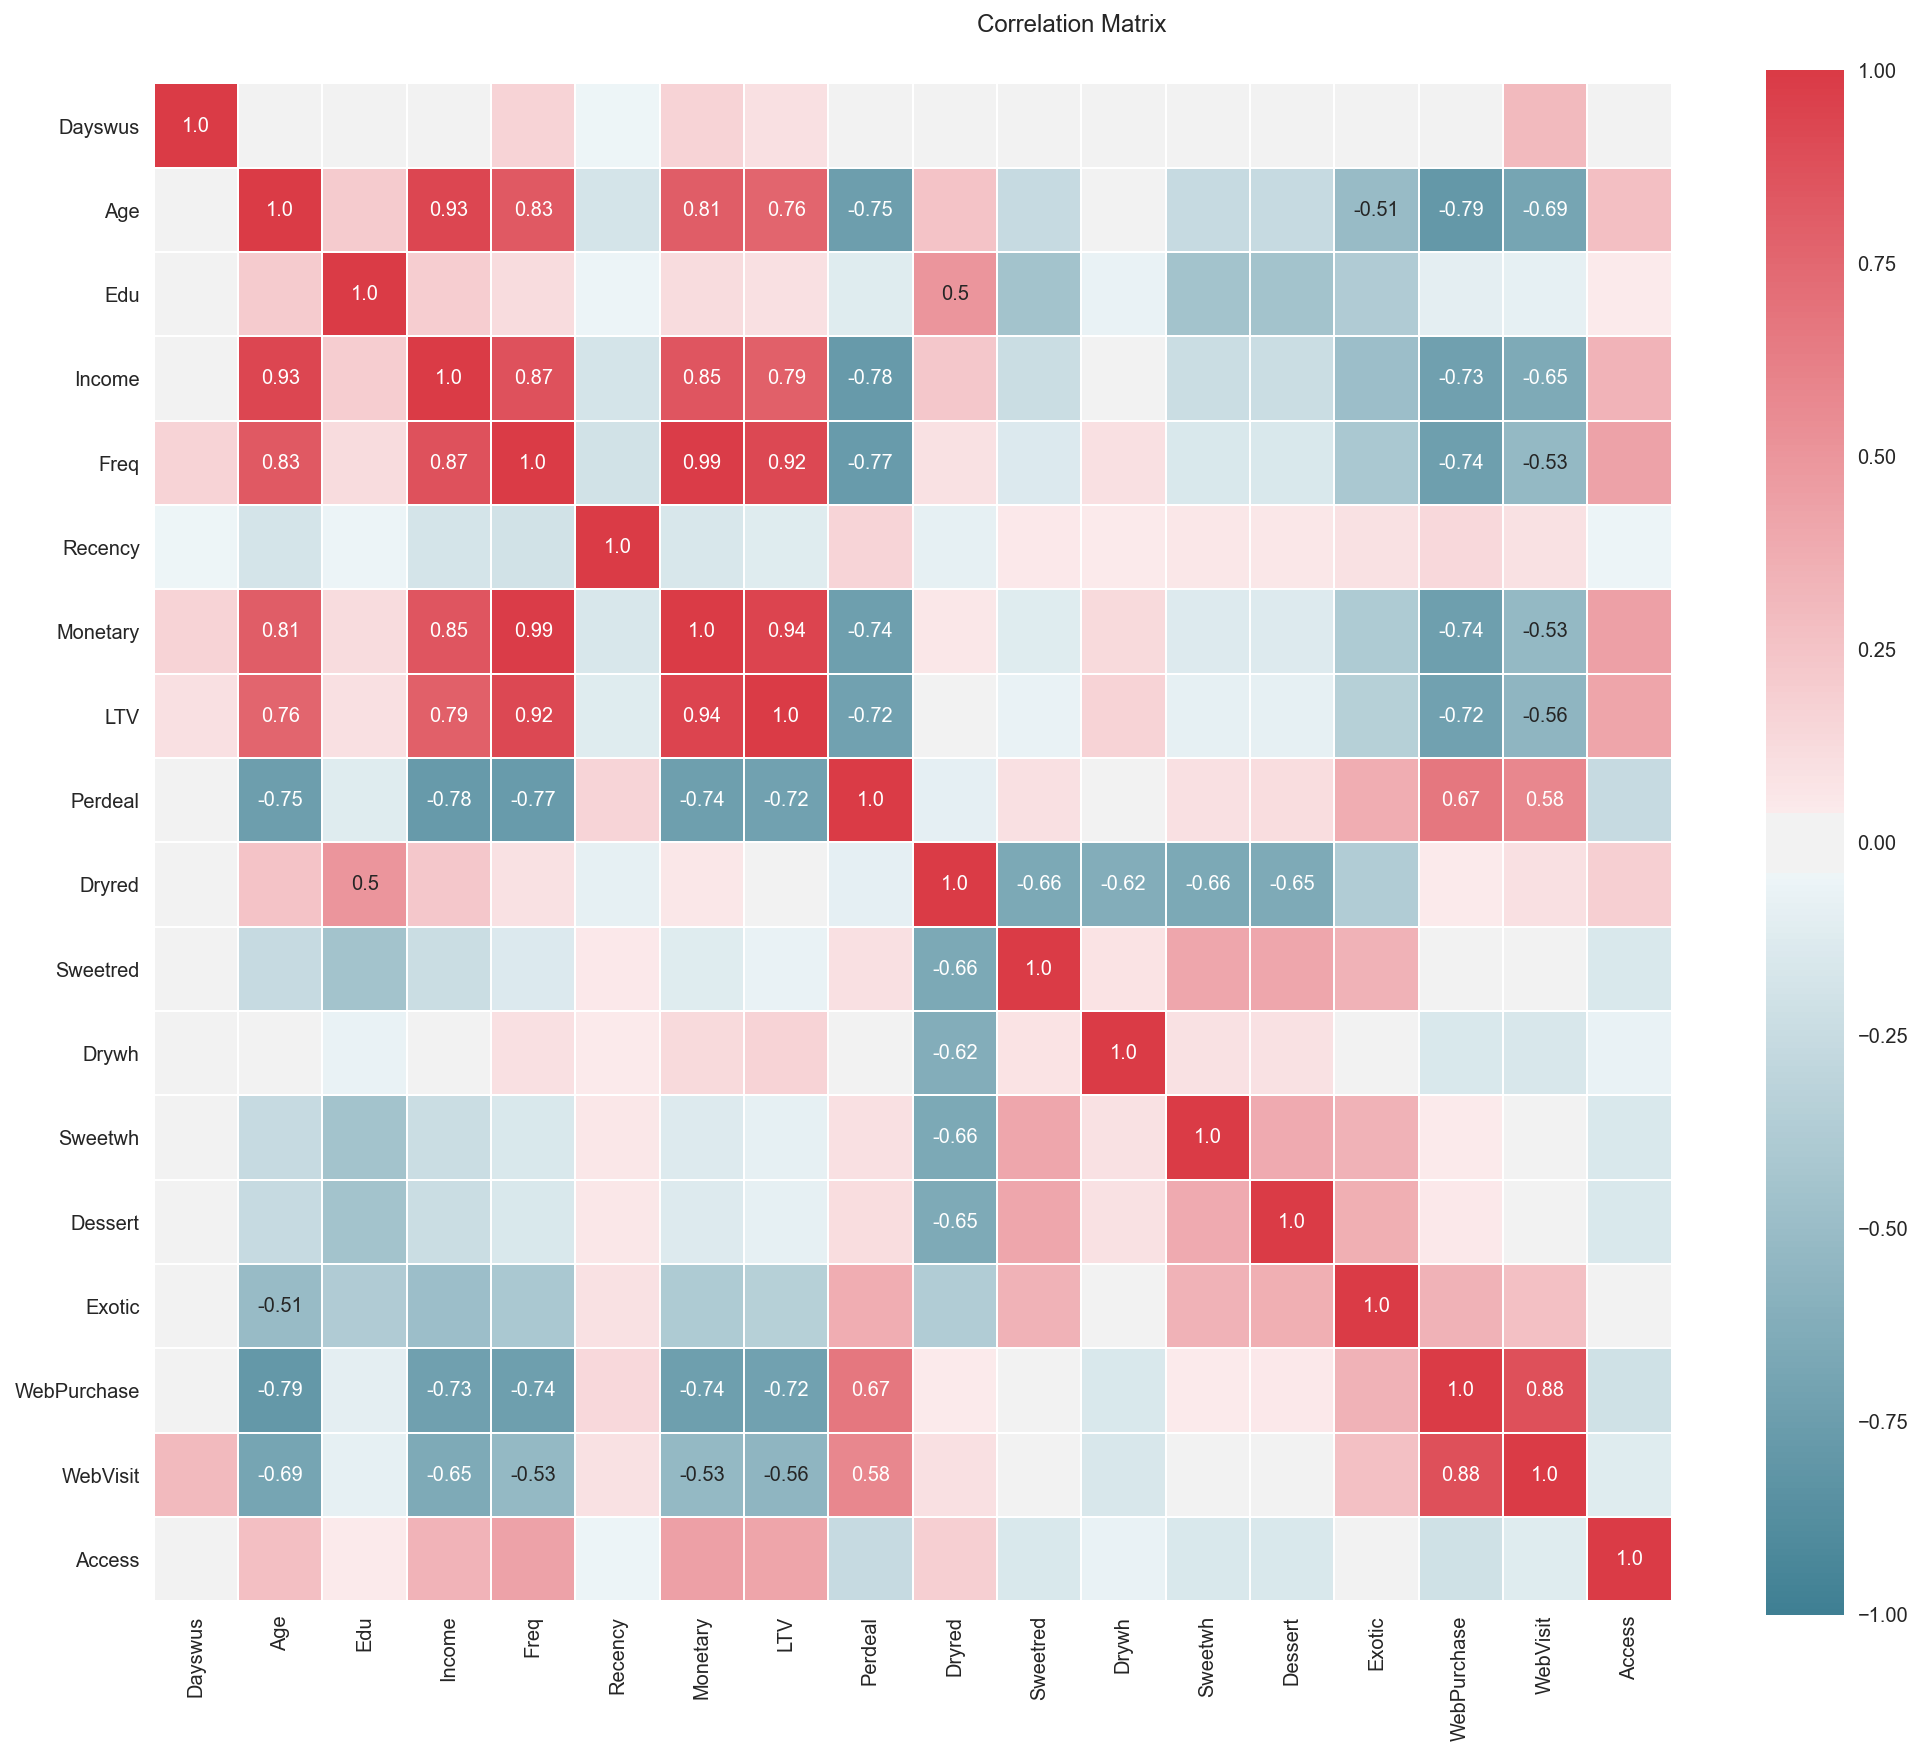

In [13]:
# Correlation analysis for continuous features

fig = plt.figure(figsize=(17, 13))

# Obtain correlation matrix. Round the values to 2 decimal cases. Use the DataFrame corr() and round() method.
corr = np.round(data[cont_feat].corr(method="pearson"), decimals=2)

# Build annotation matrix (values above |0.5| will appear annotated in the plot)
mask_annot = np.absolute(corr.values) >= 0.5
annot = np.where(mask_annot, corr.values, np.full(corr.shape,""))

# Plot heatmap of the correlation matrix
sns.heatmap(data=corr, annot=annot, cmap=sns.diverging_palette(220, 10, as_cmap=True), 
            fmt='s', vmin=-1, vmax=1, center=0, square=True, linewidths=.5)

# Layout
fig.subplots_adjust(top=0.95)
fig.suptitle("Correlation Matrix", fontsize=12)
plt.show()

# Results:

# High correlation:

# ID
# Age with + Income, Freq/Monetary/LTV - Perdeal, Web Purchase, WebVisit, Exotic
# Access with + Freq/Monetary/LTV

# Wine Type
# Dry Red with + Edu - sweetred, drywh, sweetwh, dessert
# Exotic with + Perdeal, Web Visit, Web Purchase, sweetred, sweetwh, dessert - Edu, Freq/Monetary/LTV, Age, Income

In [14]:
%matplotlib inline
%config InlineBackend.figure_format='retina'
sns.set_theme(style="whitegrid")

fig, axs = plt.subplots(1,len(bin_feat))
fig.set_size_inches(18, 4)
fig.suptitle("Metric features distributions")
for met_feat in cont_feat:
    for i, feat in enumerate(bin_feat):
        sns.boxplot(ax = axs[i], data = data, x=feat, y = 'Income', color = 'steelblue')
        axs[i].set_title(feat)
        axs[i].set_yticks([])
    plt.show()

AttributeError: module 'seaborn' has no attribute 'set_theme'

# <font color='#E8800A'>Outliers</font> <a class="anchor" id="third-bullet"></a>
  [Back to TOC](#toc)

In [15]:
# outiliers via IQR
var_outliers = ['Recency','Monetary','LTV','Sweetred','Drywh','Sweetwh','Dessert','Exotic','Access']

q25 = data.quantile(.25)
q75 = data.quantile(.90)
iqr = (q75 - q25)

upper_lim = q75 + 5 * iqr
lower_lim = q25 - 1 * iqr

filters2 = []
for metric in var_outliers:
    llim = lower_lim[metric]
    ulim = upper_lim[metric]
    filters2.append(data[metric].between(llim, ulim, inclusive=True))

filters2 = pd.DataFrame(np.all(filters2, 0))
#df_2 = data.join(filters2)
data[filters2.values]
#df_IQR = df_2[df_2[0]==True]
print('Percentage of data kept after removing outliers:', np.round(data[filters2.values].shape[0] / data.shape[0]*100, 4))

Percentage of data kept after removing outliers: 98.8


In [16]:
scaler = StandardScaler()
scaled = scaler.fit_transform(data[cont_feat])
lof = LocalOutlierFactor(contamination = 'auto')
lof_out = pd.Series(lof.fit_predict(scaled), index = data[cont_feat].index)
lof_out.value_counts(normalize = True)

 1    0.9996
-1    0.0004
dtype: float64

# <font color='#E8800A'>RFM</font> <a class="anchor" id="fourth-bullet"></a>
  [Back to TOC](#toc)

In [17]:
# Feature Eng. to get the mean ticket from our customers
data['MeanTicket'] = data['Monetary']/data['Freq']

In [18]:
#Create star Classification for RFM using 5 partitions or 5 stars.
data['Recency_score'] = pd.qcut(data['Recency'].rank(method='first'), q=5 , labels= (5,4,3,2,1))
data['Recency_score'] = data['Recency_score'].astype(int)
data['Freq_score'] = pd.qcut(data['Freq'].rank(method='first'), q=5 , labels= range(1,6))
data['Freq_score'] = data['Freq_score'].astype(int)
data['Monetary_score'] = pd.qcut(data['MeanTicket'].rank(method='first'), q=5 , labels= range(1,6))
data['Monetary_score'] = data['Monetary_score'].astype(int)

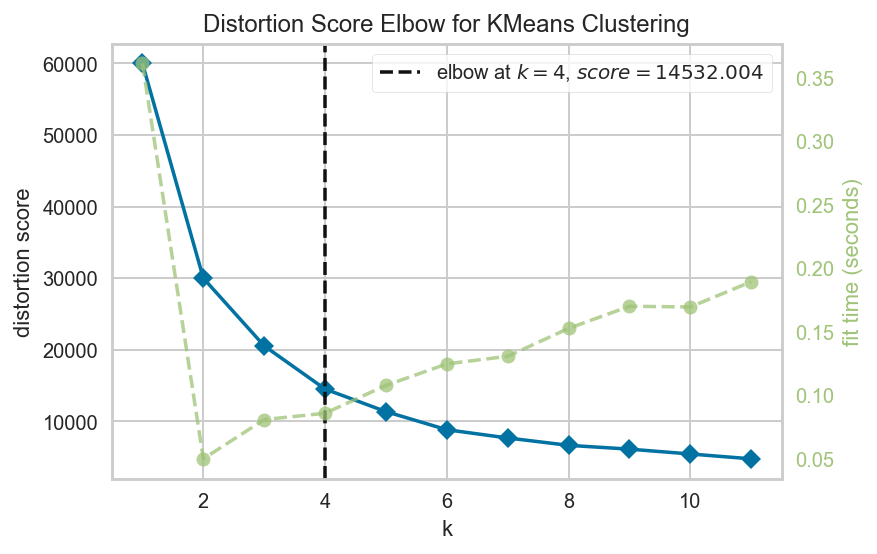

C:\Users\putos\anaconda3\lib\site-packages\sklearn\base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


KElbowVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x000001FB072D4D90>,
                 k=None, model=None)

In [19]:
#Check the loss by the number of clusters.
X = data.loc[:,['Recency_score','Freq_score', 'Monetary_score']]
kelbow_visualizer(KMeans(init='k-means++', n_init=15, max_iter=300, random_state=1), X, k=(1,12),
                 timing = False)

In [20]:
#Cluster the customers using just RFM information with 6 clusters.
kmeans = KMeans(init='k-means++', n_clusters=5, n_init=15, max_iter=300, random_state=1)
kmeans.fit(data.loc[:,['Recency_score','Freq_score', 'Monetary_score']])

KMeans(n_clusters=5, n_init=15, random_state=1)

In [21]:
# Assign the labels to data
data['Cluster_RFM'] = kmeans.labels_

In [22]:
# Create RFM Table from cluster
RFM = data.loc[:,['LTV','Recency','Freq', 'MeanTicket','Recency_score','Freq_score', 'Monetary_score','Cluster_RFM']].groupby(['Cluster_RFM']).agg(['mean'])
RFM['Total'] = RFM.loc[:,['Recency_score','Freq_score', 'Monetary_score']].sum(axis = 1)

RFM_Table = round(RFM.sort_values(by = 'Total', ascending = False),2)
RFM_Table

,LTV,Recency,Freq,MeanTicket,Recency_score,Freq_score,Monetary_score,Total
,mean,mean,mean,mean,mean,mean,mean,
Cluster_RFM,,,,,,,,
0,484.87,31.68,27.36,46.38,3.99,4.50,4.50,12.98
4,67.24,31.20,11.62,31.99,4.00,3.00,3.00,10.00
2,362.29,81.38,22.47,41.82,1.56,4.02,4.02,9.61
1,-1.32,31.08,3.61,17.51,4.01,1.55,1.49,7.06
3,-0.75,143.85,3.04,17.43,1.42,1.44,1.52,4.39


In [23]:
Cluster_Sequence =  round(RFM.sort_values(by = 'Total', ascending = False),2).index.values

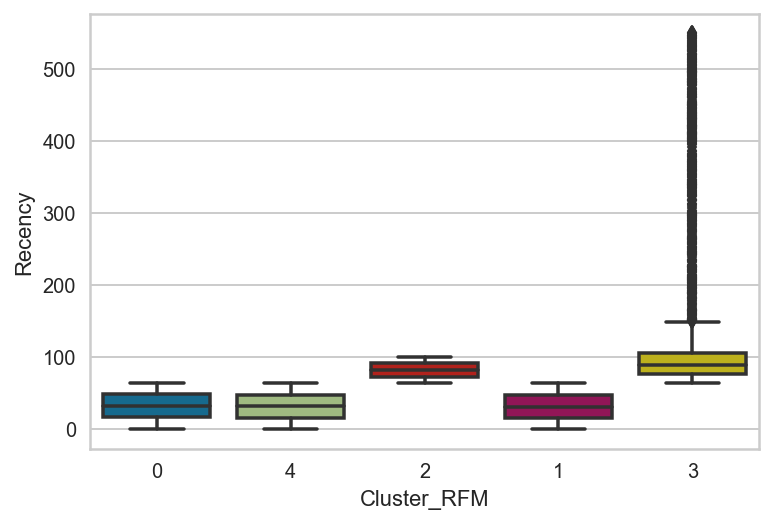

In [24]:
ax = sns.boxplot(x="Cluster_RFM", y="Recency", data=data, order = Cluster_Sequence)

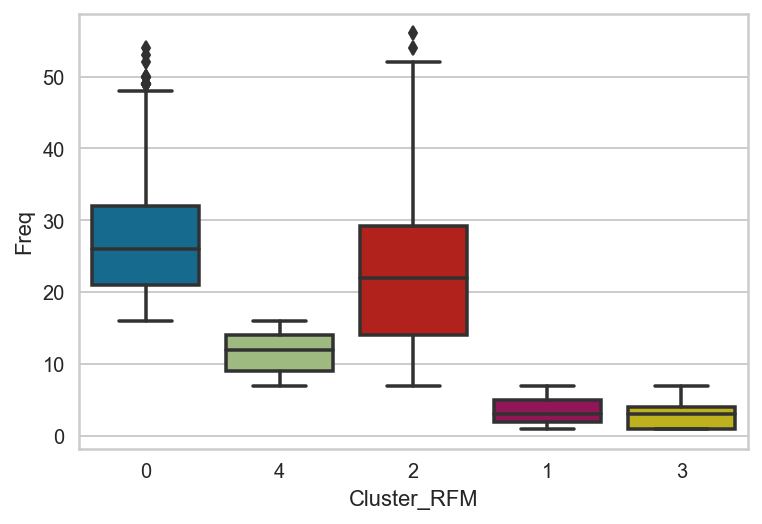

In [25]:
ax = sns.boxplot(x="Cluster_RFM", y="Freq", data=data, order = Cluster_Sequence)

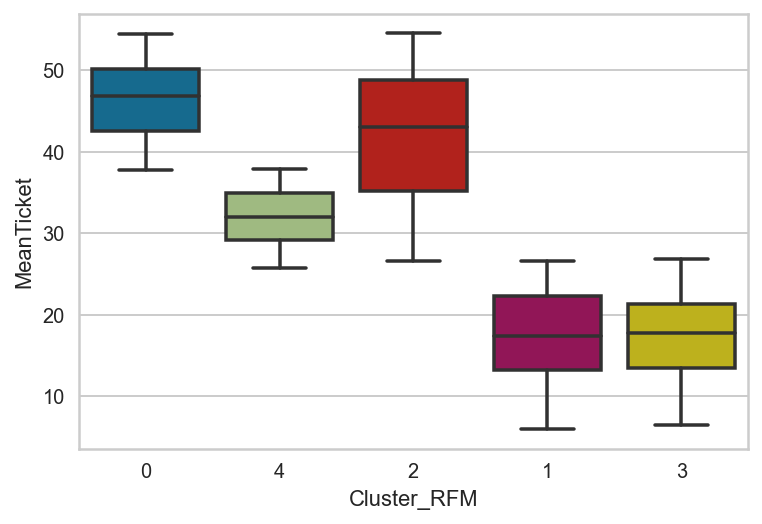

In [26]:
ax = sns.boxplot(x="Cluster_RFM", y="MeanTicket", data=data, order = Cluster_Sequence)

[Text(0, 0, '0'),
 Text(0, 0, '4'),
 Text(0, 0, '2'),
 Text(0, 0, '1'),
 Text(0, 0, '3')]

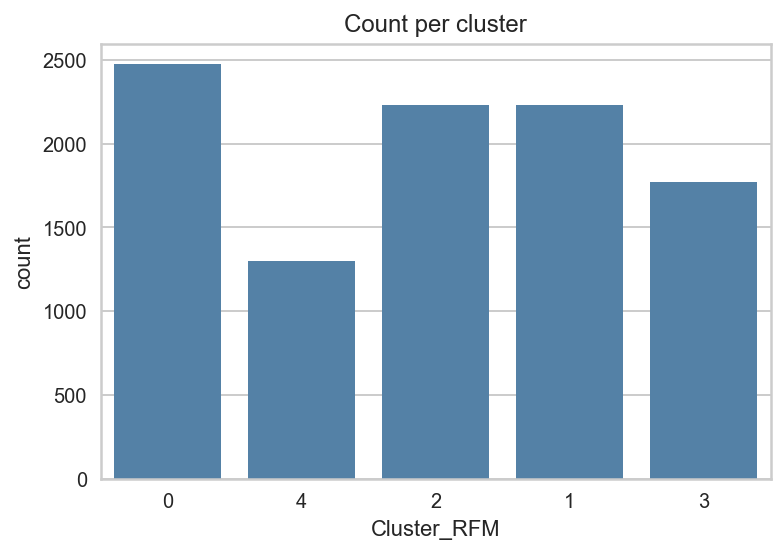

In [27]:
RFM_count = data.loc[:,['Recency_score','Freq_score', 'Monetary_score','Cluster_RFM']].groupby(['Cluster_RFM']).agg(['count'])
RFM_count_index = RFM_count['Recency_score'].reset_index()

%matplotlib inline
%config InlineBackend.figure_format='retina'
g = sns.barplot(x = RFM_count_index['Cluster_RFM'], y = RFM_count_index['count'], color = 'steelblue', order = Cluster_Sequence)
g.set_title('Count per cluster')
g.set_xticklabels(g.get_xticklabels(), rotation=0)

# <font color='#E8800A'>Groups</font> <a class="anchor" id="fifth-bullet"></a>
  [Back to TOC](#toc)

In [28]:
# Separate the variable into groups

#rfm_clusters =["Freq", "Recency", "Monetary"]
#wine_clusters=['Dryred','Sweetred','Drywh','Sweetwh','Dessert','Exotic', "Access"] 
#demographic_clusters= ['Dayswus', 'Age' , 'Edu', 'Income',  'Perdeal', "WebVisit", "WebPurchase"]# "LTV",

RFM_group = ['Freq','Recency','MeanTicket']
taste_group = ['Dryred', 'Sweetred', 'Drywh', 'Sweetwh', 'Dessert', 'Exotic', "Access"]
cust_group = ['Dayswus' , 'Edu', 'Income', 'WebVisit'] #Age, 'Perdeal', "WebPurchase"
excluded_feat = ['Age' ,'LTV', 'Perdeal', "WebPurchase"]

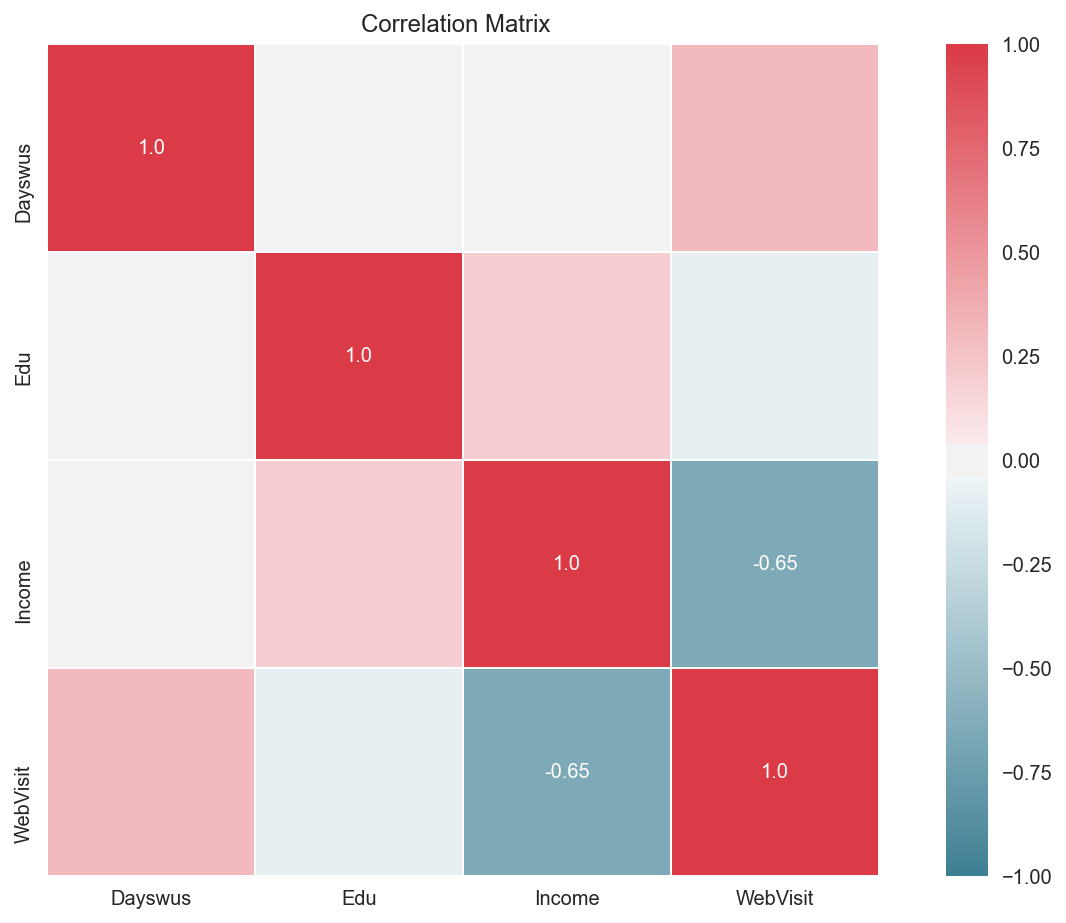

In [29]:
# Correlation analysis for continuous features

fig = plt.figure(figsize=(12, 7))

# Obtain correlation matrix. Round the values to 2 decimal cases. Use the DataFrame corr() and round() method.
corr = np.round(data[cust_group].corr(method="pearson"), decimals=2)

# Build annotation matrix (values above |0.5| will appear annotated in the plot)
mask_annot = np.absolute(corr.values) >= 0.5
annot = np.where(mask_annot, corr.values, np.full(corr.shape,""))

# Plot heatmap of the correlation matrix
sns.heatmap(data=corr, annot=annot, cmap=sns.diverging_palette(220, 10, as_cmap=True), 
            fmt='s', vmin=-1, vmax=1, center=0, square=True, linewidths=.5)

# Layout
fig.subplots_adjust(top=0.95)
fig.suptitle("Correlation Matrix", fontsize=12)
plt.show()

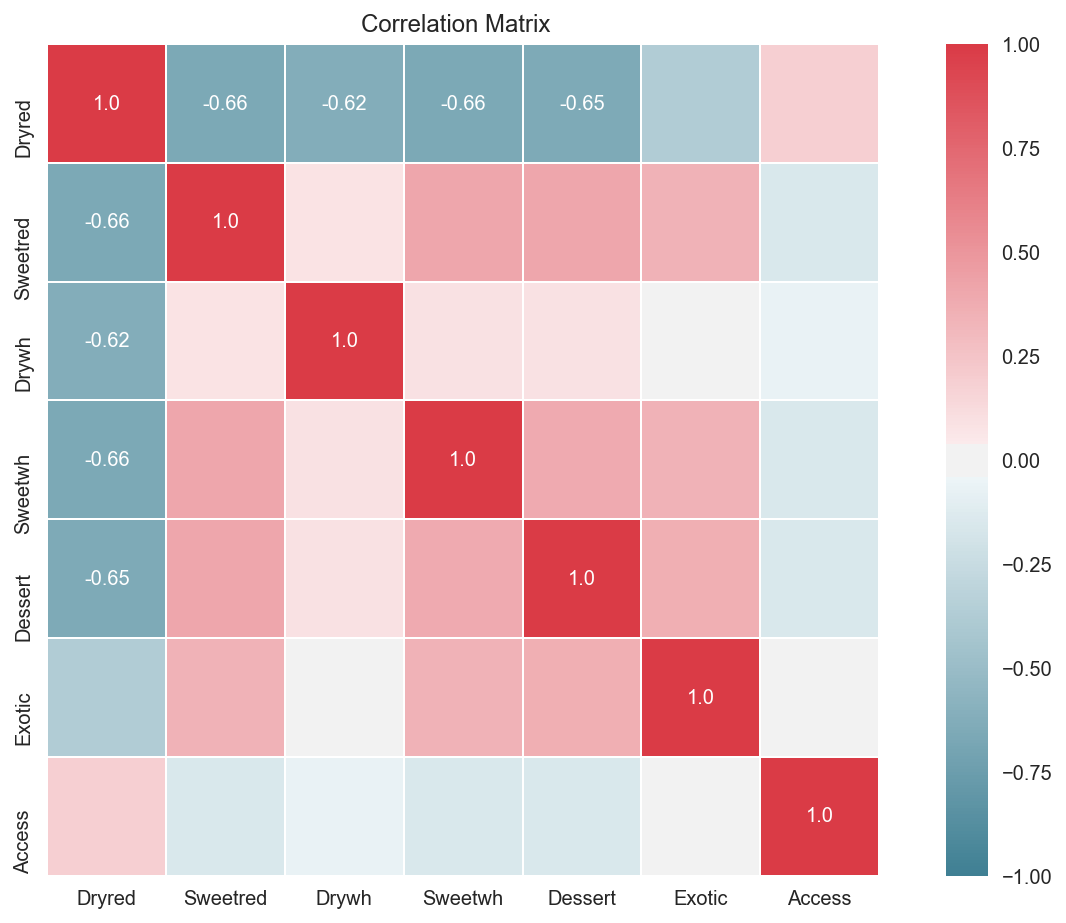

In [30]:
# Correlation analysis for continuous features

fig = plt.figure(figsize=(12, 7))

# Obtain correlation matrix. Round the values to 2 decimal cases. Use the DataFrame corr() and round() method.
corr = np.round(data[taste_group].corr(method="pearson"), decimals=2)

# Build annotation matrix (values above |0.5| will appear annotated in the plot)
mask_annot = np.absolute(corr.values) >= 0.5
annot = np.where(mask_annot, corr.values, np.full(corr.shape,""))

# Plot heatmap of the correlation matrix
sns.heatmap(data=corr, annot=annot, cmap=sns.diverging_palette(220, 10, as_cmap=True), 
            fmt='s', vmin=-1, vmax=1, center=0, square=True, linewidths=.5)

# Layout
fig.subplots_adjust(top=0.95)
fig.suptitle("Correlation Matrix", fontsize=12)
plt.show()

In [31]:
#Normalize the data set
scaler = MinMaxScaler()
cluster_feat = RFM_group + taste_group + cust_group + excluded_feat
data_no_norm = data.copy()
data[cluster_feat] = scaler.fit_transform(data[cluster_feat])

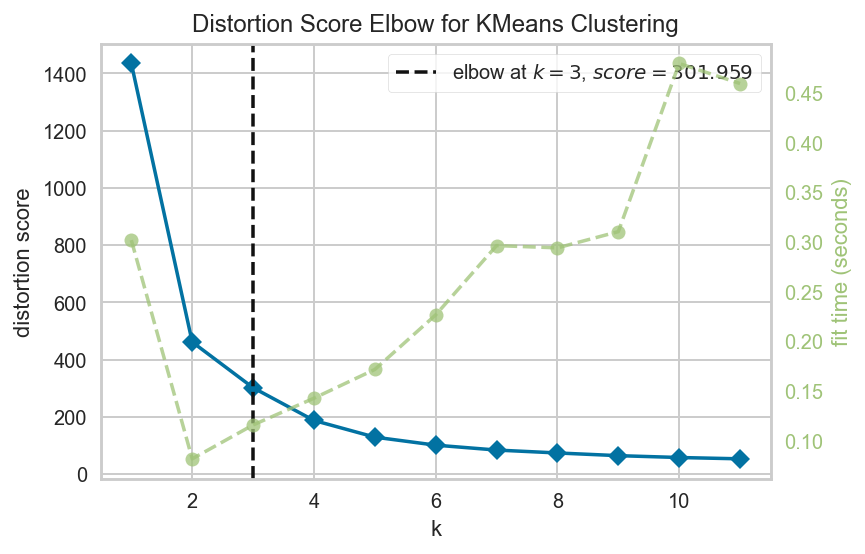

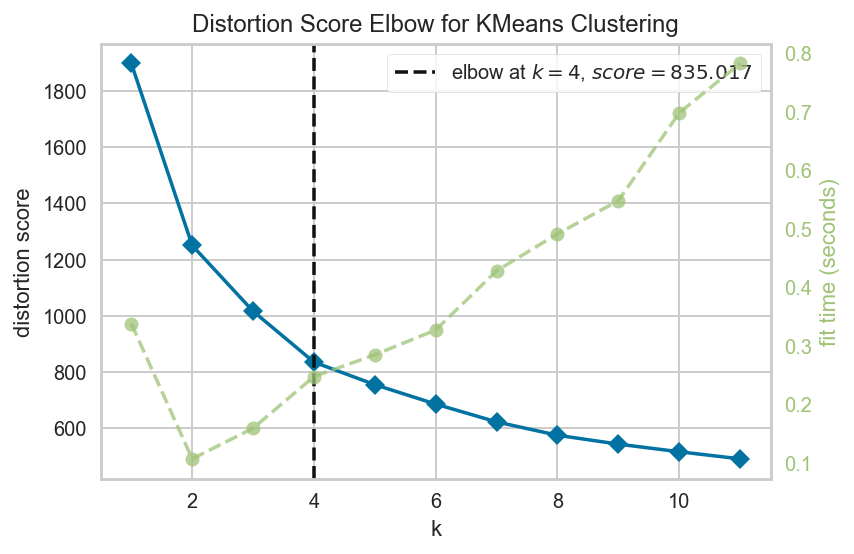

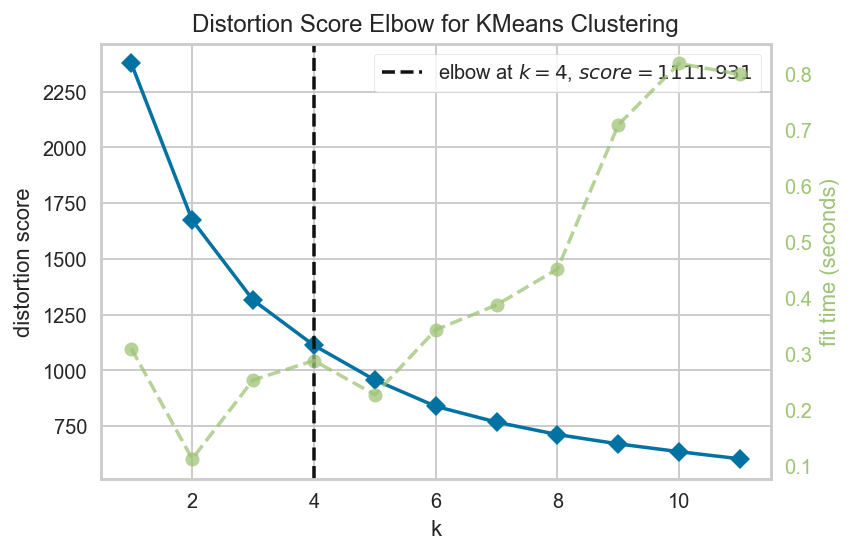

C:\Users\putos\anaconda3\lib\site-packages\sklearn\base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


KElbowVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x000001FB05FAA640>,
                 k=None, model=None)

In [32]:
#Check the loss by the number of clusters for taste_group
X = data[RFM_group]
kelbow_visualizer(KMeans(init='k-means++', n_init=15, max_iter=300, random_state=1), X, k=(1,12),
                 timing = False)

X = data[taste_group]
kelbow_visualizer(KMeans(init='k-means++', n_init=15, max_iter=300, random_state=1), X, k=(1,12),
                 timing = False)

X = data[cust_group]
kelbow_visualizer(KMeans(init='k-means++', n_init=15, max_iter=300, random_state=1), X, k=(1,12),
                 timing = False)



In [33]:



#Cluster the customers using taste_group 6 clusters.
#kmeans_rfm = KMeans(init='k-means++', n_clusters=3, n_init=15, max_iter=300, random_state=1)
#kmeans_rfm.fit(data[RFM_group])

#Cluster the customers using id_group 5 clusters.
kmeans_taste = KMeans(init='k-means++', n_clusters=4, n_init=15, max_iter=300, random_state=1)
kmeans_taste.fit(data[taste_group])

#Cluster the customers using cust_group with 6 clusters.
kmeans_cust = KMeans(init='k-means++', n_clusters=4, n_init=15, max_iter=300, random_state=1)
kmeans_cust.fit(data[cust_group])

KMeans(n_clusters=4, n_init=15, random_state=1)

In [34]:
#data['Cluster_rfm'] = kmeans_rfm.labels_
data['Cluster_taste'] = kmeans_taste.labels_
data['Cluster_cust'] = kmeans_cust.labels_

In [35]:
# Centroids of the concatenated cluster labels
df_centroids = data.groupby(['Cluster_taste', 'Cluster_cust'])\
                            [taste_group+cust_group].mean()
df_centroids

Dryred  Sweetred     Drywh   Sweetwh   Dessert  \
Cluster_taste Cluster_cust                                                     
0             0             0.172068  0.235046  0.372452  0.301918  0.228248   
              1             0.172580  0.237737  0.365800  0.301149  0.231959   
              2             0.238916  0.229885  0.326051  0.281563  0.208912   
              3             0.260204  0.207667  0.343493  0.289919  0.179383   
1             0             0.369787  0.106400  0.525622  0.120528  0.103058   
              1             0.371343  0.102686  0.530872  0.119219  0.100889   
              2             0.361895  0.111350  0.518041  0.133940  0.104417   
              3             0.364316  0.110583  0.521060  0.128518  0.103939   
2             0             0.730252  0.034258  0.256488  0.040859  0.033224   
              1             0.724500  0.036745  0.257628  0.043469  0.034772   
              2             0.675464  0.052018  0.276817  0.063316  0.048623   
              3             0.692037  0.049167  0.265139  0.056543  0.046912   
3             0             0.782918  0.023108  0.217618  0.029503  0.022600   
              1             0.761027  0.030022  0.228016  0.036524  0.029409   
              2             0.626526  0.051945  0.344356  0.059634  0.049873   
              3             0.669265  0.044969  0.302385  0.056265  0.044793   

                              Exotic    Access   Dayswus       Edu    Income  \
Cluster_taste Cluster_cust                                                     
0             0             0.468851  0.046850  0.245013  0.357229  0.194683   
              1             0.465119  0.031091  0.750070  0.336965  0.185430   
              2             0.278915  0.040230  0.232808  0.359914  0.645049   
              3             0.351823  0.058333  0.762304  0.409375  0.604657   
1             0             0.178740  0.013348  0.260011  0.562987  0.294468   
              1             0.169800  0.016269  0.756345  0.563138  0.287405   
              2             0.080194  0.055121  0.246937  0.581091  0.676309   
              3             0.085144  0.050605  0.743850  0.599147  0.663759   
2             0             0.131402  0.000000  0.271447  0.675023  0.381438   
              1             0.145006  0.000000  0.767269  0.638603  0.388208   
              2             0.087172  0.000000  0.218769  0.723832  0.578679   
              3             0.086559  0.000000  0.713200  0.753906  0.571027   
3             0             0.205998  0.372479  0.248393  0.640125  0.438287   
              1             0.213978  0.375269  0.760866  0.595565  0.446833   
              2             0.084721  0.497982  0.221429  0.661925  0.724671   
              3             0.089000  0.476852  0.722427  0.690683  0.699739   

                            WebVisit  
Cluster_taste Cluster_cust            
0             0             0.599031  
              1             0.726911  
              2             0.193966  
              3             0.301250  
1             0             0.613682  
              1             0.749035  
              2             0.205871  
              3             0.310231  
2             0             0.599076  
              1             0.730980  
              2             0.315052  
              3             0.469602  
3             0             0.642349  
              1             0.761935  
              2             0.268765  
              3             0.429630

In [36]:
# Using Hierarchical clustering to merge the concatenated cluster centroids
hclust = AgglomerativeClustering(
    linkage='ward', 
    affinity='euclidean', 
    distance_threshold=0, 
    n_clusters=None
)
hclust_labels = hclust.fit_predict(df_centroids)

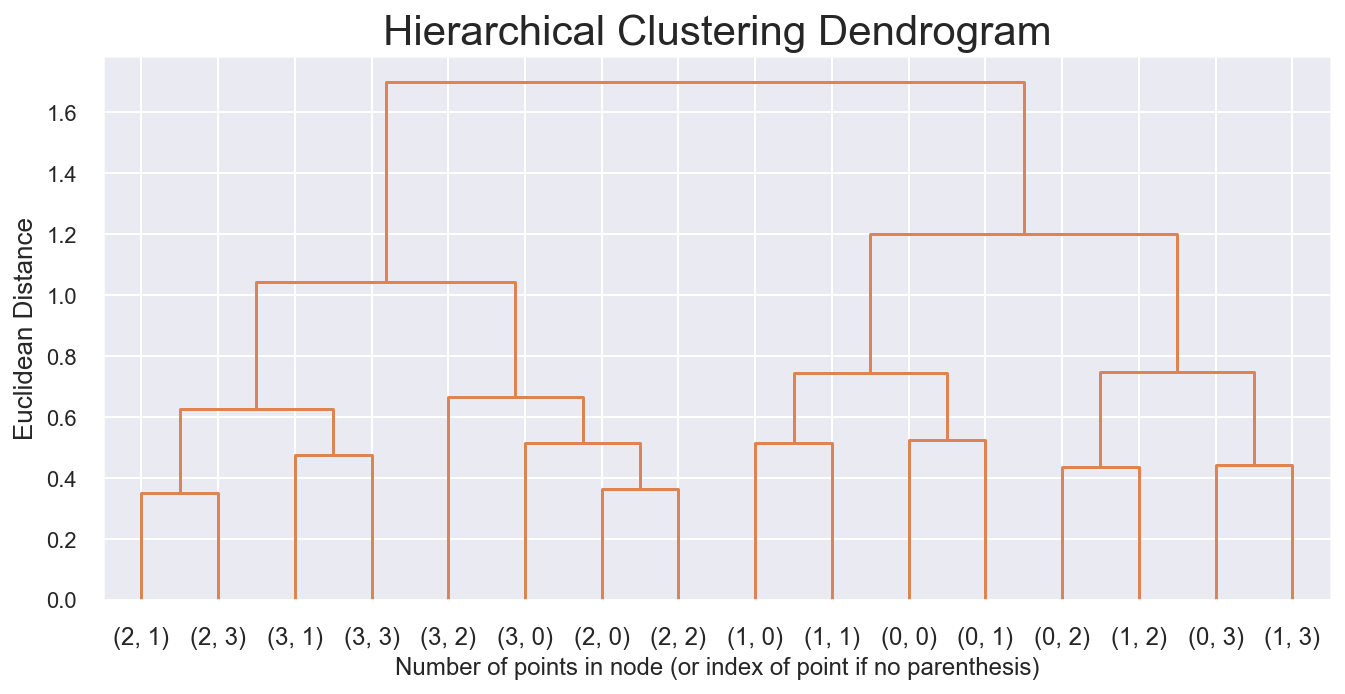

In [37]:
# Adapted from:
# https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html#sphx-glr-auto-examples-cluster-plot-agglomerative-dendrogram-py

# create the counts of samples under each node (number of points being merged)
counts = np.zeros(hclust.children_.shape[0])
n_samples = len(hclust.labels_)

# hclust.children_ contains the observation ids that are being merged together
# At the i-th iteration, children[i][0] and children[i][1] are merged to form node n_samples + i
for i, merge in enumerate(hclust.children_):
    # track the number of observations in the current cluster being formed
    current_count = 0
    for child_idx in merge:
        if child_idx < n_samples:
            # If this is True, then we are merging an observation
            current_count += 1  # leaf node
        else:
            # Otherwise, we are merging a previously formed cluster
            current_count += counts[child_idx - n_samples]
    counts[i] = current_count

# the hclust.children_ is used to indicate the two points/clusters being merged (dendrogram's u-joins)
# the hclust.distances_ indicates the distance between the two points/clusters (height of the u-joins)
# the counts indicate the number of points being merged (dendrogram's x-axis)
linkage_matrix = np.column_stack(
    [hclust.children_, hclust.distances_, counts]
).astype(float)

# Plot the corresponding dendrogram
sns.set()
fig = plt.figure(figsize=(11,5))
# The Dendrogram parameters need to be tuned
y_threshold = 2.3
dendrogram(linkage_matrix, truncate_mode='level', labels=df_centroids.index, p=5, color_threshold=y_threshold, above_threshold_color='k')
plt.hlines(y_threshold, 0, 1000, colors="r", linestyles="dashed")
plt.title(f'Hierarchical Clustering Dendrogram', fontsize=21)
plt.xlabel('Number of points in node (or index of point if no parenthesis)')
plt.ylabel(f'Euclidean Distance', fontsize=13)
plt.show()

In [38]:
# Re-running the Hierarchical clustering based on the correct number of clusters
hclust = AgglomerativeClustering(
    linkage='ward', 
    affinity='euclidean', 
    n_clusters=4
)
hclust_labels = hclust.fit_predict(df_centroids)
df_centroids['hclust_labels'] = hclust_labels

df_centroids  # centroid's cluster labels

Dryred  Sweetred     Drywh   Sweetwh   Dessert  \
Cluster_taste Cluster_cust                                                     
0             0             0.172068  0.235046  0.372452  0.301918  0.228248   
              1             0.172580  0.237737  0.365800  0.301149  0.231959   
              2             0.238916  0.229885  0.326051  0.281563  0.208912   
              3             0.260204  0.207667  0.343493  0.289919  0.179383   
1             0             0.369787  0.106400  0.525622  0.120528  0.103058   
              1             0.371343  0.102686  0.530872  0.119219  0.100889   
              2             0.361895  0.111350  0.518041  0.133940  0.104417   
              3             0.364316  0.110583  0.521060  0.128518  0.103939   
2             0             0.730252  0.034258  0.256488  0.040859  0.033224   
              1             0.724500  0.036745  0.257628  0.043469  0.034772   
              2             0.675464  0.052018  0.276817  0.063316  0.048623   
              3             0.692037  0.049167  0.265139  0.056543  0.046912   
3             0             0.782918  0.023108  0.217618  0.029503  0.022600   
              1             0.761027  0.030022  0.228016  0.036524  0.029409   
              2             0.626526  0.051945  0.344356  0.059634  0.049873   
              3             0.669265  0.044969  0.302385  0.056265  0.044793   

                              Exotic    Access   Dayswus       Edu    Income  \
Cluster_taste Cluster_cust                                                     
0             0             0.468851  0.046850  0.245013  0.357229  0.194683   
              1             0.465119  0.031091  0.750070  0.336965  0.185430   
              2             0.278915  0.040230  0.232808  0.359914  0.645049   
              3             0.351823  0.058333  0.762304  0.409375  0.604657   
1             0             0.178740  0.013348  0.260011  0.562987  0.294468   
              1             0.169800  0.016269  0.756345  0.563138  0.287405   
              2             0.080194  0.055121  0.246937  0.581091  0.676309   
              3             0.085144  0.050605  0.743850  0.599147  0.663759   
2             0             0.131402  0.000000  0.271447  0.675023  0.381438   
              1             0.145006  0.000000  0.767269  0.638603  0.388208   
              2             0.087172  0.000000  0.218769  0.723832  0.578679   
              3             0.086559  0.000000  0.713200  0.753906  0.571027   
3             0             0.205998  0.372479  0.248393  0.640125  0.438287   
              1             0.213978  0.375269  0.760866  0.595565  0.446833   
              2             0.084721  0.497982  0.221429  0.661925  0.724671   
              3             0.089000  0.476852  0.722427  0.690683  0.699739   

                            WebVisit  hclust_labels  
Cluster_taste Cluster_cust                           
0             0             0.599031              2  
              1             0.726911              2  
              2             0.193966              0  
              3             0.301250              0  
1             0             0.613682              2  
              1             0.749035              2  
              2             0.205871              0  
              3             0.310231              0  
2             0             0.599076              1  
              1             0.730980              3  
              2             0.315052              1  
              3             0.469602              3  
3             0             0.642349              1  
              1             0.761935              3  
              2             0.268765              1  
              3             0.429630              3

In [39]:
# Mapper between concatenated clusters and hierarchical clusters
cluster_mapper = df_centroids['hclust_labels'].to_dict()

df_ = data.copy()

# Mapping the hierarchical clusters on the centroids to the observations
df_['merged_labels'] = df_.apply(
    lambda row: cluster_mapper[
        (row['Cluster_taste'], row['Cluster_cust'])
    ], axis=1
)

# Merged cluster centroids
df_.groupby('merged_labels').mean()[RFM_group+taste_group+cust_group]

,Freq,Recency,MeanTicket,Dryred,Sweetred,Drywh,Sweetwh,Dessert,Exotic,Access,Dayswus,Edu,Income,WebVisit
merged_labels,,,,,,,,,,,,,,
0,0.443228,0.092134,0.787738,0.352398,0.121110,0.502296,0.145540,0.112731,0.103364,0.052500,0.477913,0.570287,0.666546,0.253409
1,0.224392,0.112457,0.523873,0.704888,0.040391,0.272256,0.048312,0.038658,0.121256,0.131832,0.246985,0.680544,0.496873,0.476551
2,0.076104,0.141007,0.279945,0.287904,0.159546,0.461845,0.195619,0.155427,0.296327,0.024784,0.505175,0.472896,0.248841,0.674026
3,0.314082,0.099574,0.642963,0.710148,0.040887,0.263890,0.048570,0.039319,0.127180,0.130711,0.743173,0.675233,0.502344,0.607461


In [40]:
#Merge cluster contigency table
# Getting size of each final cluster
df_counts = df_.groupby('merged_labels')\
    .size()\
    .to_frame()

# Getting the product and behavior labels
df_counts = df_counts\
    .rename({v:k for k, v in cluster_mapper.items()})\
    .reset_index()

df_counts['Cluster_cust'] = df_counts['merged_labels'].apply(lambda x: x[0])
df_counts['Cluster_taste'] = df_counts['merged_labels'].apply(lambda x: x[1])
df_counts.pivot('Cluster_cust', 'Cluster_taste', 0)

Cluster_taste,1,2,3
Cluster_cust,,,
1,3053.0,NaN,2127.0
3,NaN,2354.0,2466.0


In [41]:
def cluster_profiles(df, label_columns, figsize, compar_titles=None):
    """
    Pass df with labels columns of one or multiple clustering labels. 
    Then specify this label columns to perform the cluster profile according to them.
    """
    if compar_titles == None:
        compar_titles = [""]*len(label_columns)
        
    sns.set()
    fig, axes = plt.subplots(nrows=len(label_columns), ncols=2, figsize=figsize, squeeze=False)
    for ax, label, titl in zip(axes, label_columns, compar_titles):
        # Filtering df
        drop_cols = [i for i in label_columns if i!=label]
        dfax = df.drop(drop_cols, axis=1)
        
        # Getting the cluster centroids and counts
        centroids = dfax.groupby(by=label, as_index=False).mean()
        counts = dfax.groupby(by=label, as_index=False).count().iloc[:,[0,1]]
        counts.columns = [label, "counts"]
        
        # Setting Data
        pd.plotting.parallel_coordinates(centroids, label, color=sns.color_palette(), ax=ax[0])
        sns.barplot(x=label, y="counts", data=counts, ax=ax[1])

        #Setting Layout
        handles, _ = ax[0].get_legend_handles_labels()
        cluster_labels = ["Cluster {}".format(i) for i in range(len(handles))]
#        ax[0].annotate(text=titl, xy=(0.95,1.1), xycoords='axes fraction', fontsize=13, fontweight = 'heavy') 
        ax[0].legend(handles, cluster_labels) # Adaptable to number of clusters
        ax[0].axhline(color="black", linestyle="--")
        ax[0].set_title("Cluster Means - {} Clusters".format(len(handles)), fontsize=13)
        ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=-20)
        ax[1].set_xticklabels(cluster_labels)
        ax[1].set_xlabel("")
        ax[1].set_ylabel("Absolute Frequency")
        ax[1].set_title("Cluster Sizes - {} Clusters".format(len(handles)), fontsize=13)
    
    plt.subplots_adjust(hspace=0.4, top=0.90)
    plt.suptitle("Cluster Simple Profilling", fontsize=23)
    plt.show()

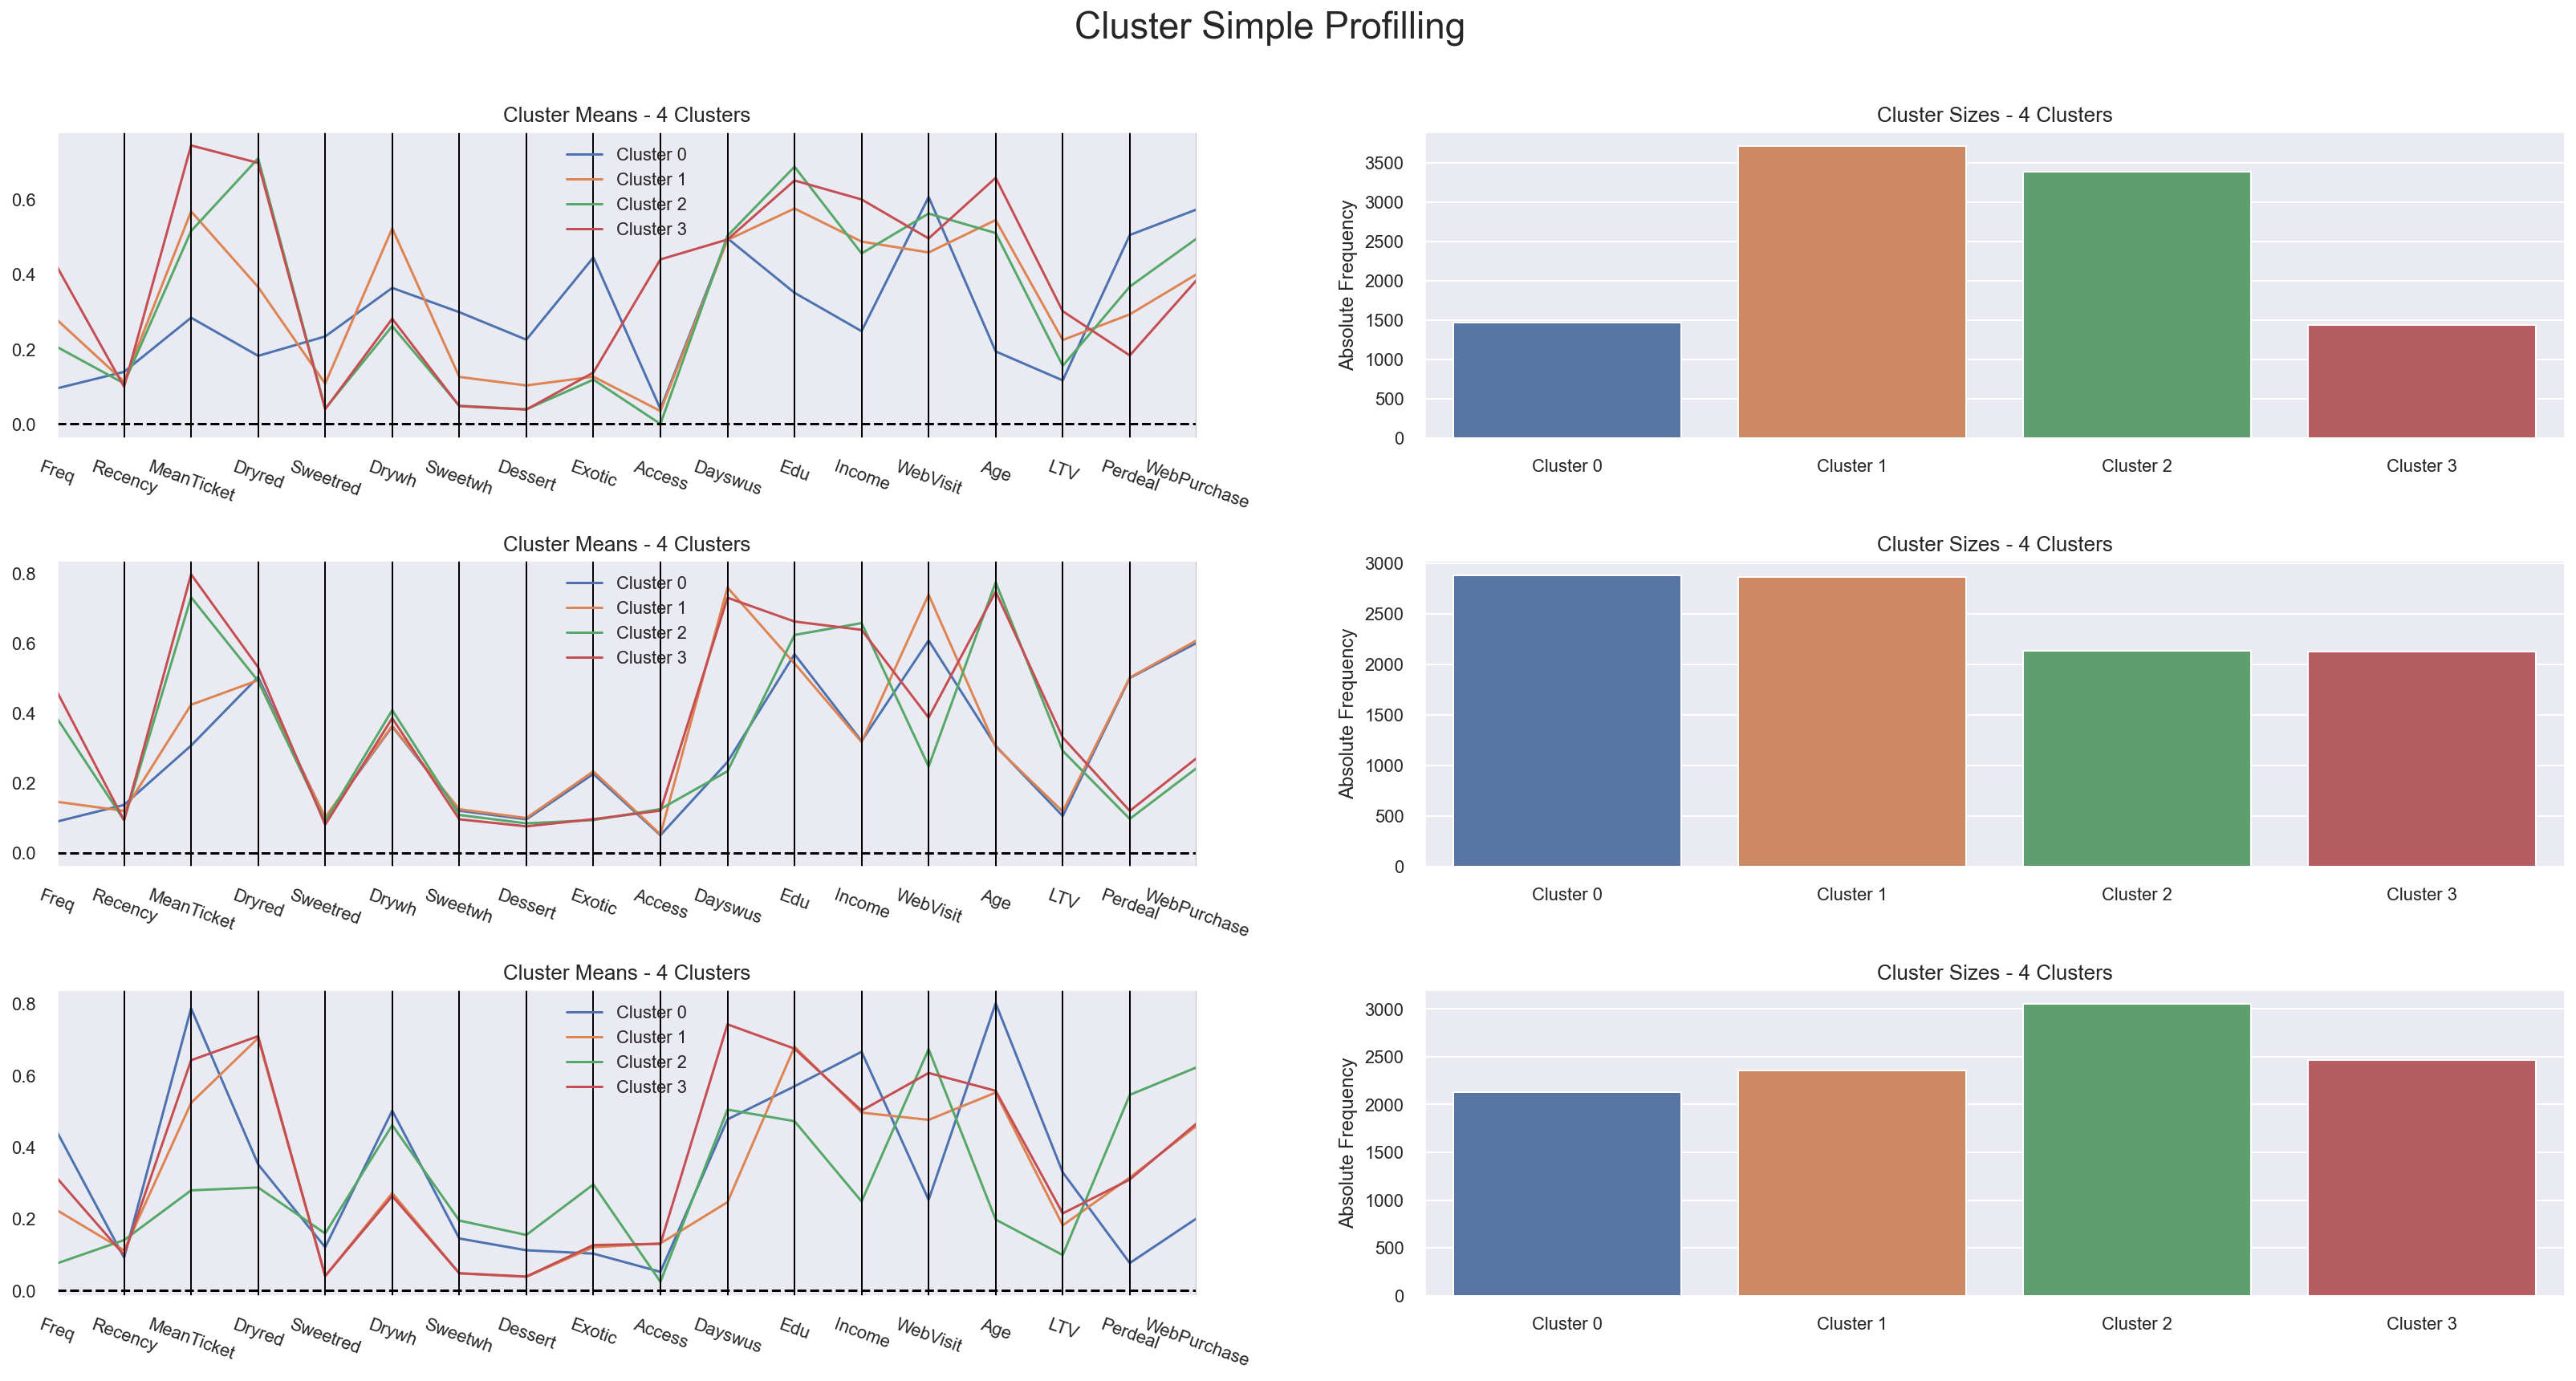

In [42]:
# Profilling each cluster (product, behavior, merged)
cluster_profiles(
    df = df_[RFM_group + taste_group + cust_group + excluded_feat + ['Cluster_taste', 'Cluster_cust', 'merged_labels']],
    label_columns = ['Cluster_taste', 'Cluster_cust', 'merged_labels'], 
    figsize = (28, 13), 
    compar_titles = ["Cluster_taste", "Cluster_cust", "Merged clusters"]
)

# <font color='#E8800A'>RFM and Merged data Analysis</font> <a class="anchor" id="sixth-bullet"></a>
  [Back to TOC](#toc)


In [43]:
data['merged_labels'] = df_['merged_labels']

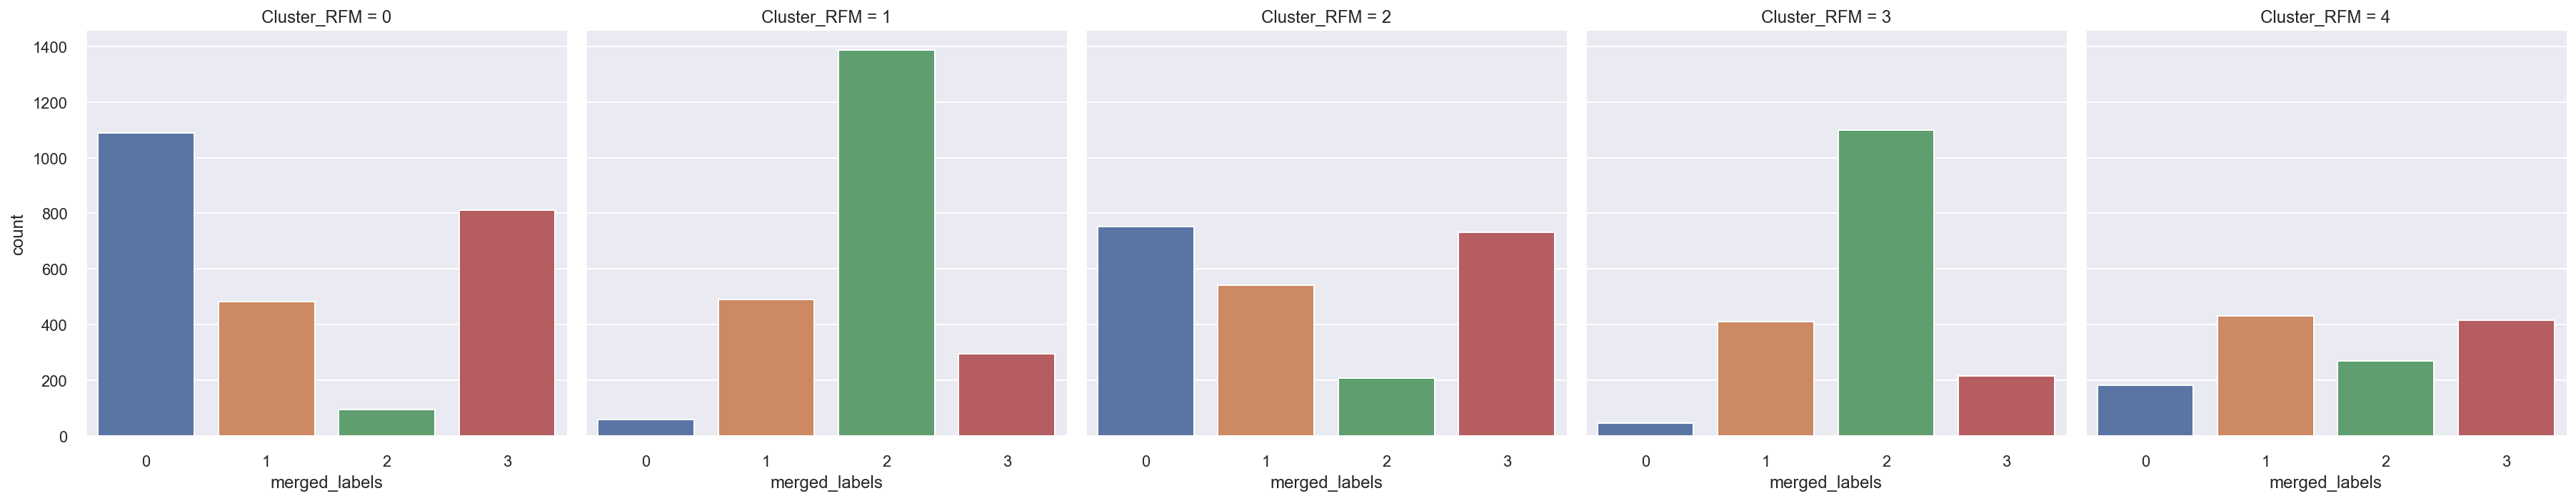

In [44]:
ax = sns.catplot(x="merged_labels", data=data, col = 'Cluster_RFM', kind="count")

In [45]:
RFM_Table

,LTV,Recency,Freq,MeanTicket,Recency_score,Freq_score,Monetary_score,Total
,mean,mean,mean,mean,mean,mean,mean,
Cluster_RFM,,,,,,,,
0,484.87,31.68,27.36,46.38,3.99,4.50,4.50,12.98
4,67.24,31.20,11.62,31.99,4.00,3.00,3.00,10.00
2,362.29,81.38,22.47,41.82,1.56,4.02,4.02,9.61
1,-1.32,31.08,3.61,17.51,4.01,1.55,1.49,7.06
3,-0.75,143.85,3.04,17.43,1.42,1.44,1.52,4.39


# <font color='#E8800A'>Tsni</font> <a class="anchor" id="seventh-bullet"></a>
  [Back to TOC](#toc)

In [46]:
# This is step can be quite time consuming
two_dim = TSNE(random_state=42).fit_transform(data[cluster_feat])

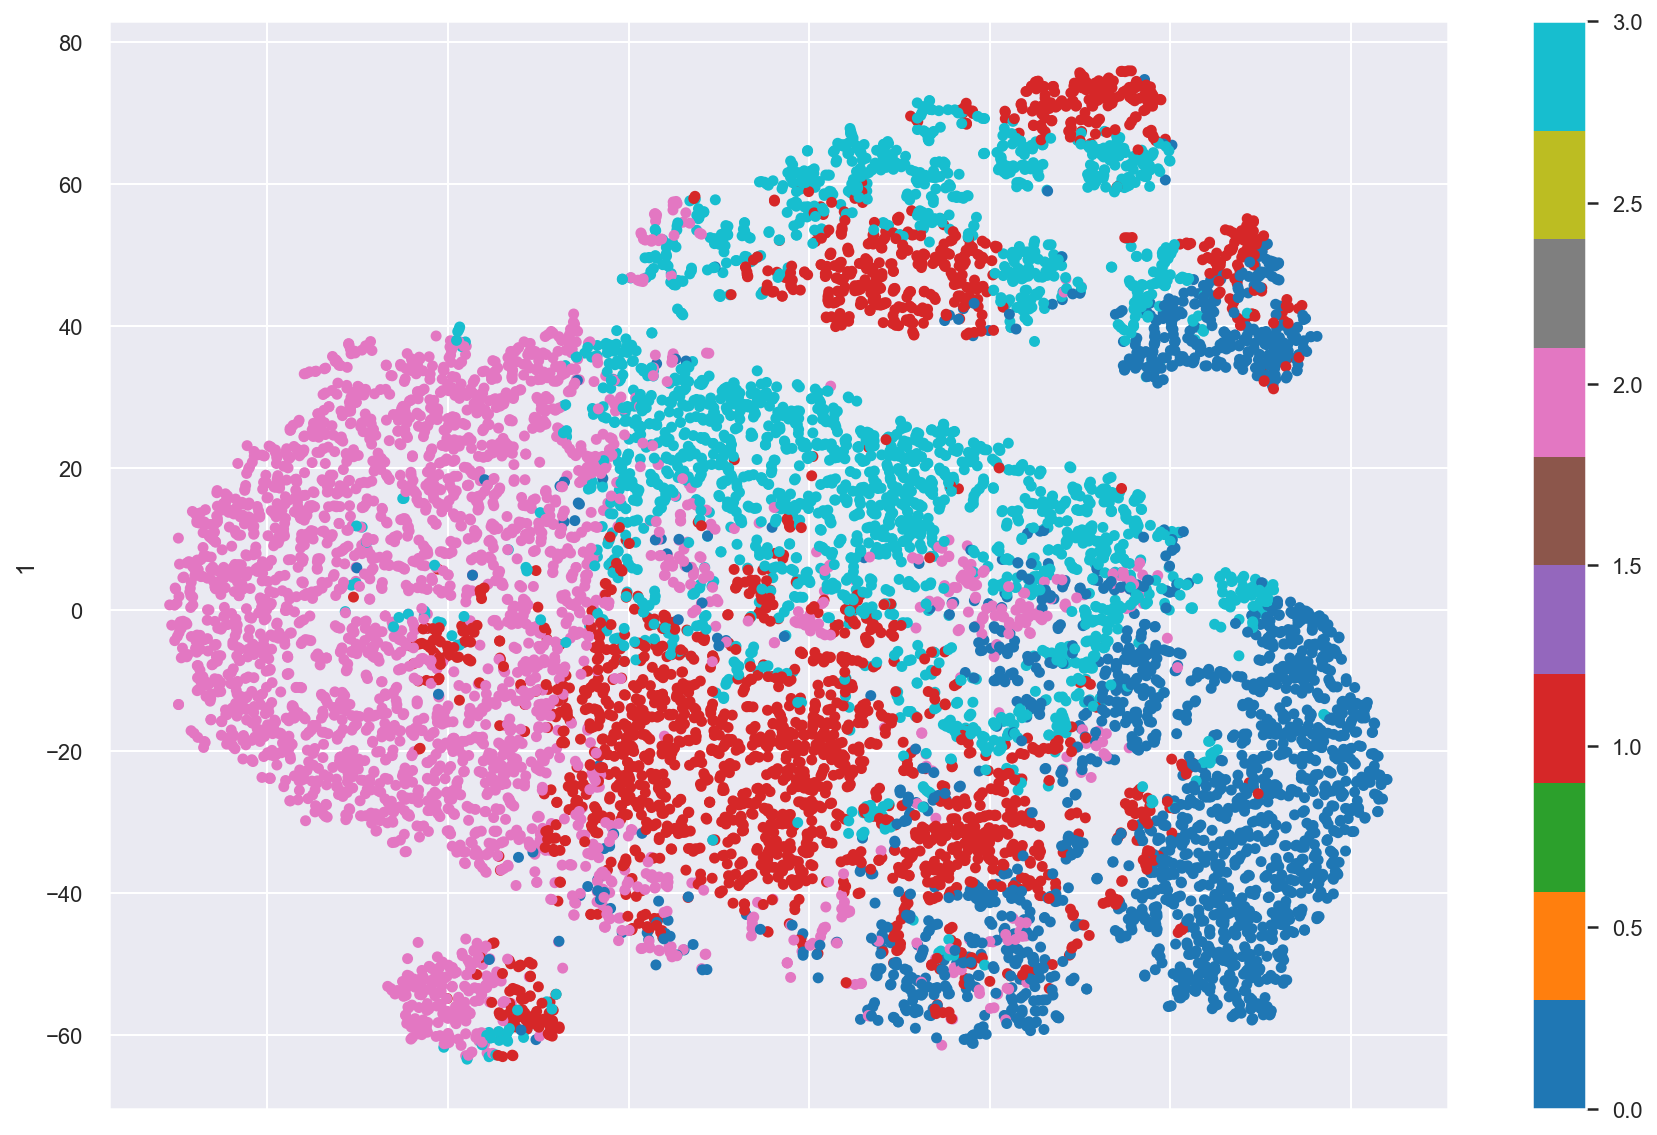

In [47]:
# t-SNE visualization
pd.DataFrame(two_dim).plot.scatter(x=0, y=1, c=data['merged_labels'], colormap='tab10', figsize=(15,10))
plt.show()

# <font color='#E8800A'>Decision Tree Evaluation</font> <a class="anchor" id="eigth-bullet"></a>
  [Back to TOC](#toc)

In [48]:
# Preparing the data
data_no_norm['merged_labels'] = data['merged_labels']
X = data_no_norm.drop(columns=['Cluster_RFM', 'merged_labels', 'Recency_score','Monetary_score', 'Freq_score'])
y = data_no_norm.merged_labels

In [49]:
# Splitting the data: Train and test
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.30, 
                                                    random_state=15, 
                                                    shuffle=True, 
                                                    stratify=y
                                                   )

In [50]:
# Fitting the decision tree 
dt = DecisionTreeClassifier(splitter="best", random_state=0, max_depth= 9, criterion="gini")
dt.fit(X_train, y_train)

print("It is estimated that in average, we are able to predict {0:.2f}% of the customers correctly".format(dt.score(X_test, y_test)*100))

It is estimated that in average, we are able to predict 94.90% of the customers correctly


In [54]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import classification_report, confusion_matrix, precision_score
from joblib import dump
from pathlib import Path
# Defining PROJECT_ROOT
#PROJECT_ROOT = Path(os.path.abspath("C:/Users/putos/OneDrive/Documents/Segundo Semestre/Deep Learning/CNN)).resolve().parents[0]

In [ ]:
train_path= "C:/Users/putos/OneDrive/Documents/Segundo Semestre/Deep Learning/CNN/dogs-vs-cats/train"

In [55]:
# Define the Decision Tree model
dt = DecisionTreeClassifier(random_state=0)

# Define the grid to explore
grid = {
    "criterion": ["entropy", "gini"],
    "splitter": ["random", "best"],
    "max_depth": [3, 6, 9],
    "min_samples_split": [0.005, 0.01, 0.05],
    "max_features": [None, "sqrt"],
    "class_weight": [None, 'balanced', {0: 1, 1: 2}]
    }

In [56]:
# Instatiating GridSearch
splitter = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
gscv = GridSearchCV(dt, grid, cv=splitter, scoring='f1_micro', refit=True, verbose=0, n_jobs=1)

# Get ID of grid search
# id_num = input("Insert GridSearch ID number: ")
id_num = 1
gscv.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=0, shuffle=True),
             estimator=DecisionTreeClassifier(random_state=0), n_jobs=1,
             param_grid={'class_weight': [None, 'balanced', {0: 1, 1: 2}],
                         'criterion': ['entropy', 'gini'],
                         'max_depth': [3, 6, 9], 'max_features': [None, 'sqrt'],
                         'min_samples_split': [0.005, 0.01, 0.05],
                         'splitter': ['random', 'best']},
             scoring='f1_micro')

In [129]:
# Saving cv_results for specific Grid Search run
#out_path = Path(os.path.abspath("C:/Users/putos/OneDrive/Documents/Segundo Semestre/Deep Learning/CNN"))os.path.join(PROJECT_ROOT, 'analysis')
#score_summary = pd.DataFrame(gscv.cv_results_).sort_values(by="mean_test_score", ascending=False)
#score_summary.to_csv(os.path.join(out_path, 'grid_search_results{}.csv'.format(id_num)))

# Saving best model
best_dt = gscv.best_estimator_
#dump(best_dt, os.path.join(out_path, 'best_decision_tree{}.joblib'.format(id_num)))

# Get test set y_pred and evaluate on precision
#y_test_pred = best_dt.predict(X_test)

#print("The best model has a mean cross-validated precision of {0:.3f} and a test set precision of {1:.3f}".\
 #     format(gscv.best_score_, precision_score(y_test, y_test_pred)))
print("\nThe hyper-parameters selected are:\n", gscv.best_params_)


The hyper-parameters selected are:
 {'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 9, 'max_features': None, 'min_samples_split': 0.005, 'splitter': 'best'}


In [58]:
# Binarize the output
y_train = label_binarize(y_train, classes=[0, 1, 2, 3])
n_classes = y_train.shape[1]
classifier = OneVsRestClassifier(DecisionTreeClassifier(class_weight= 'balanced', criterion= 'entropy',
                                                        max_depth= 9, max_features= None, min_samples_split= 0.005, 
                                                        splitter= 'best'))
#classifier.fit(X_train, y_train)
y_score = classifier.fit(X_train, y_train).predict_proba(X_test)
pred = classifier.predict(X_test)

In [59]:
y_test= label_binarize(y_test, classes=[0, 1, 2, 3])

In [61]:
# Test set classification report
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.90      0.96      0.93       638
           1       0.92      0.97      0.94       706
           2       0.92      0.97      0.95       916
           3       0.92      0.97      0.95       740

   micro avg       0.91      0.97      0.94      3000
   macro avg       0.91      0.97      0.94      3000
weighted avg       0.92      0.97      0.94      3000
 samples avg       0.94      0.97      0.95      3000



In [93]:
from sklearn.metrics import precision_recall_curve
from scikitplot.metrics import plot_cumulative_gain, plot_lift_curve

In [ ]:
# Decision Tree Feature Importance plot
sns.set()
# data
feature_names = data_no_norm.drop(columns=['Cluster_RFM', 'merged_labels', 'Recency_score','Monetary_score', 'Freq_score']).columns
for i in range(n_classes):
    feature_importances = pd.Series(classifier.estimators_[i].feature_importances_, index=feature_names).\
        sort_values(ascending=False)
    # figure
    fig = plt.figure(figsize=(19,5))
    # axis
    plt.bar(x=feature_importances.index, height=feature_importances.values)
    # properties
    plt.ylabel("Gini importance")  # The importance of a feature is computed as the (normalized) total reduction of the 
                               # criterion brought by that feature. It is also known as the Gini importance.
    plt.xticks(rotation=90)
    plt.title('Decision Tree Feature Importance of class {0} (precision = {1:0.2f})'
             ''.format(i, precision[i][1]))#"Decision Tree Feature Importance {0}", fontsize=18)
    plt.show()

# precision recall curve

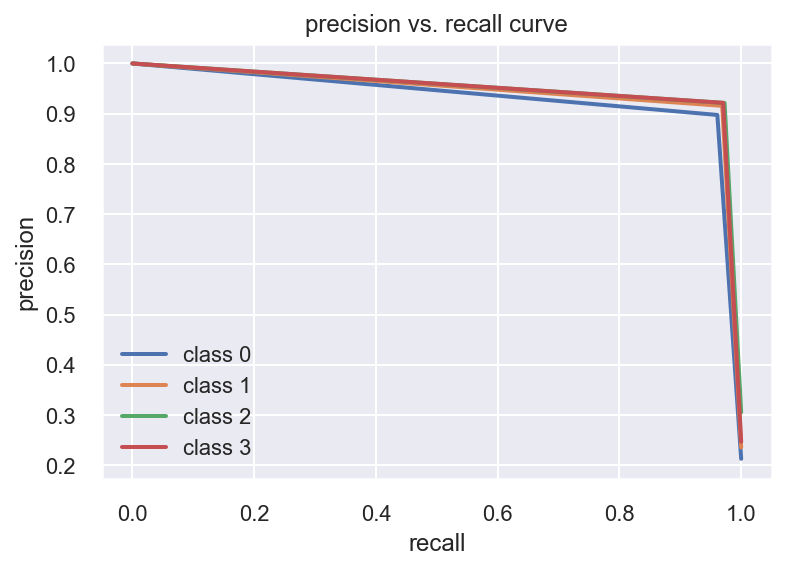

In [125]:
# precision recall curve
precision = dict()
recall = dict()
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_test[:, i],
                                                        pred[:, i])
    plt.plot(recall[i], precision[i], lw=2, label='class {}'.format(i))
    
plt.xlabel("recall")
plt.ylabel("precision")
plt.legend(loc="best")
plt.title("precision vs. recall curve")
plt.show()

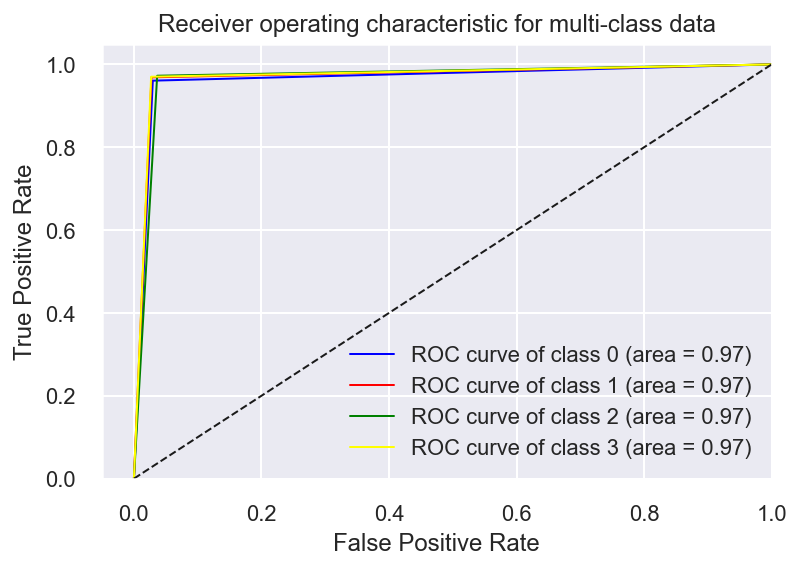

In [64]:
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
colors = cycle(['blue', 'red', 'green', 'yellow'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i],  color=color, lw=1,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--', lw=1)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class data')
plt.legend(loc="lower right")
plt.show()

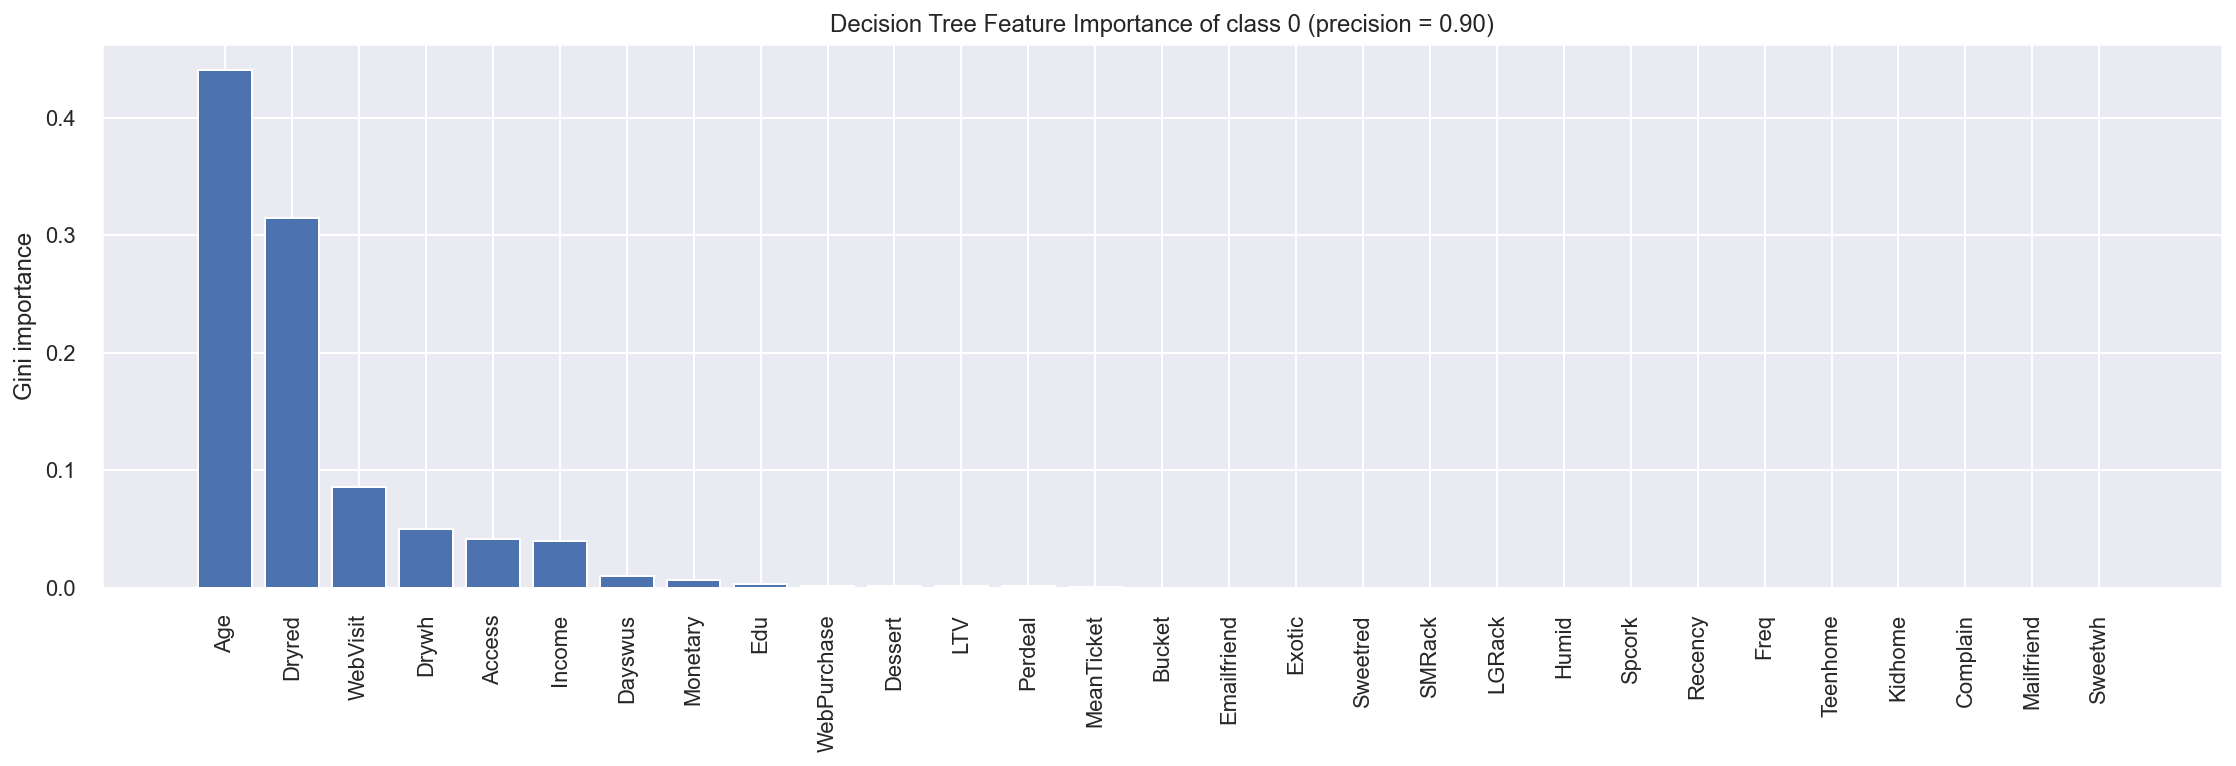

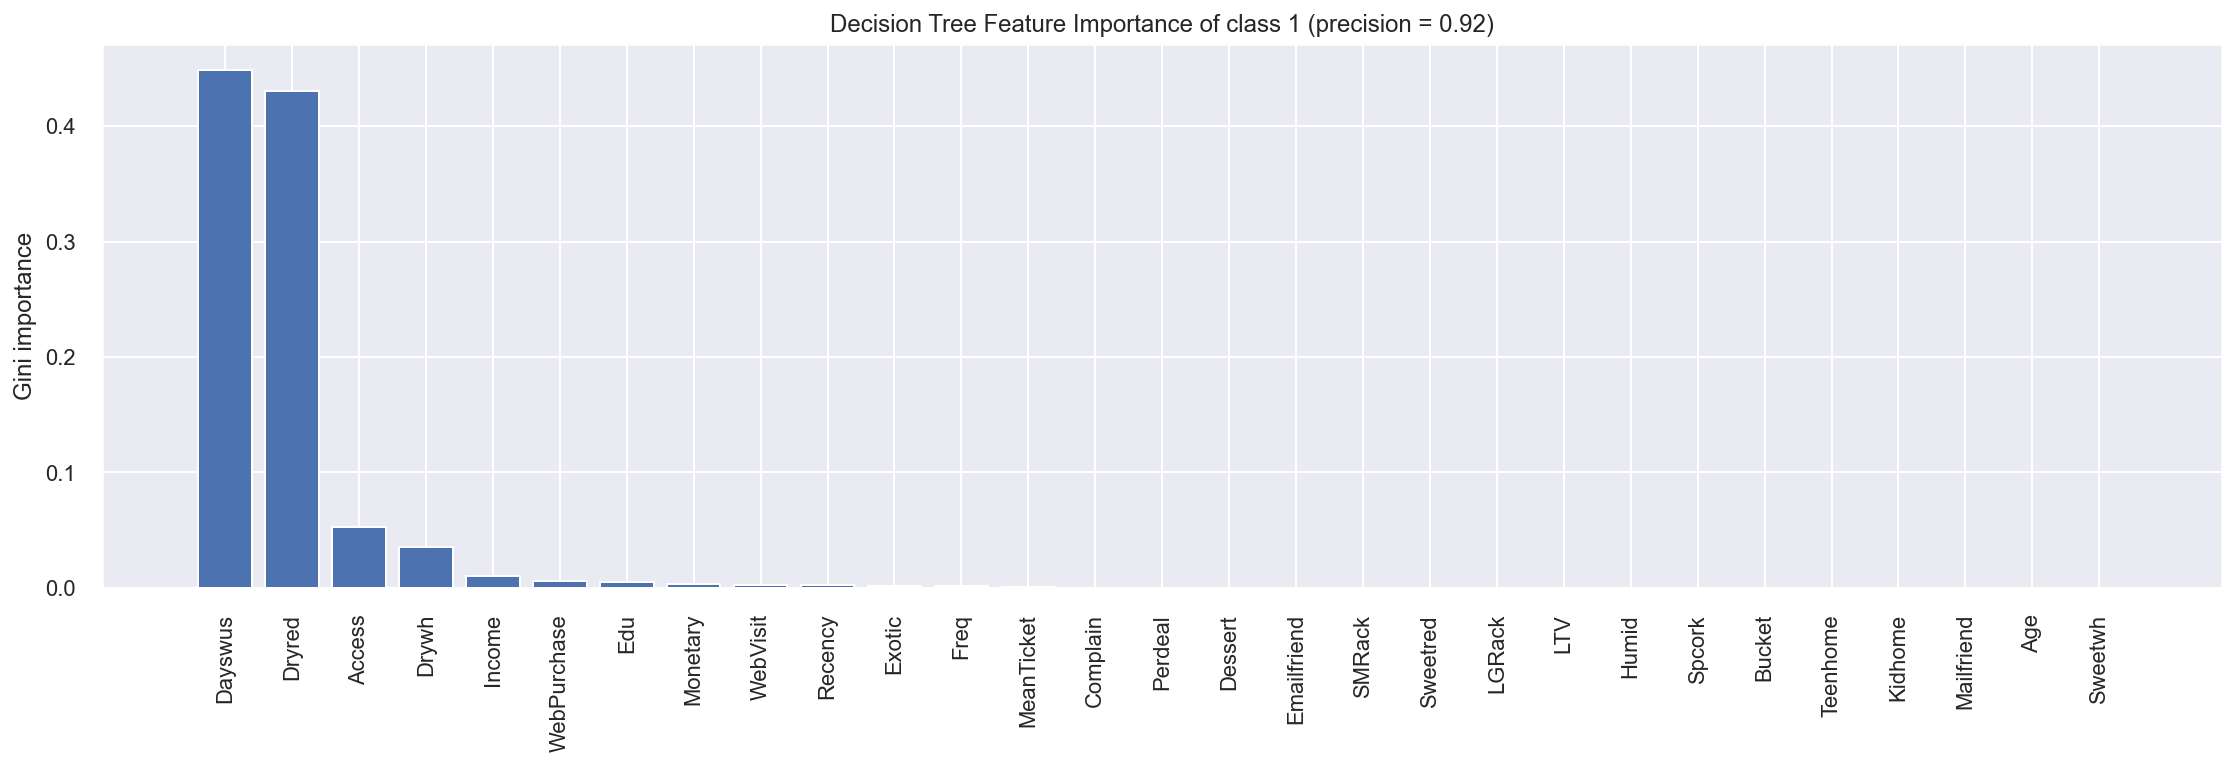

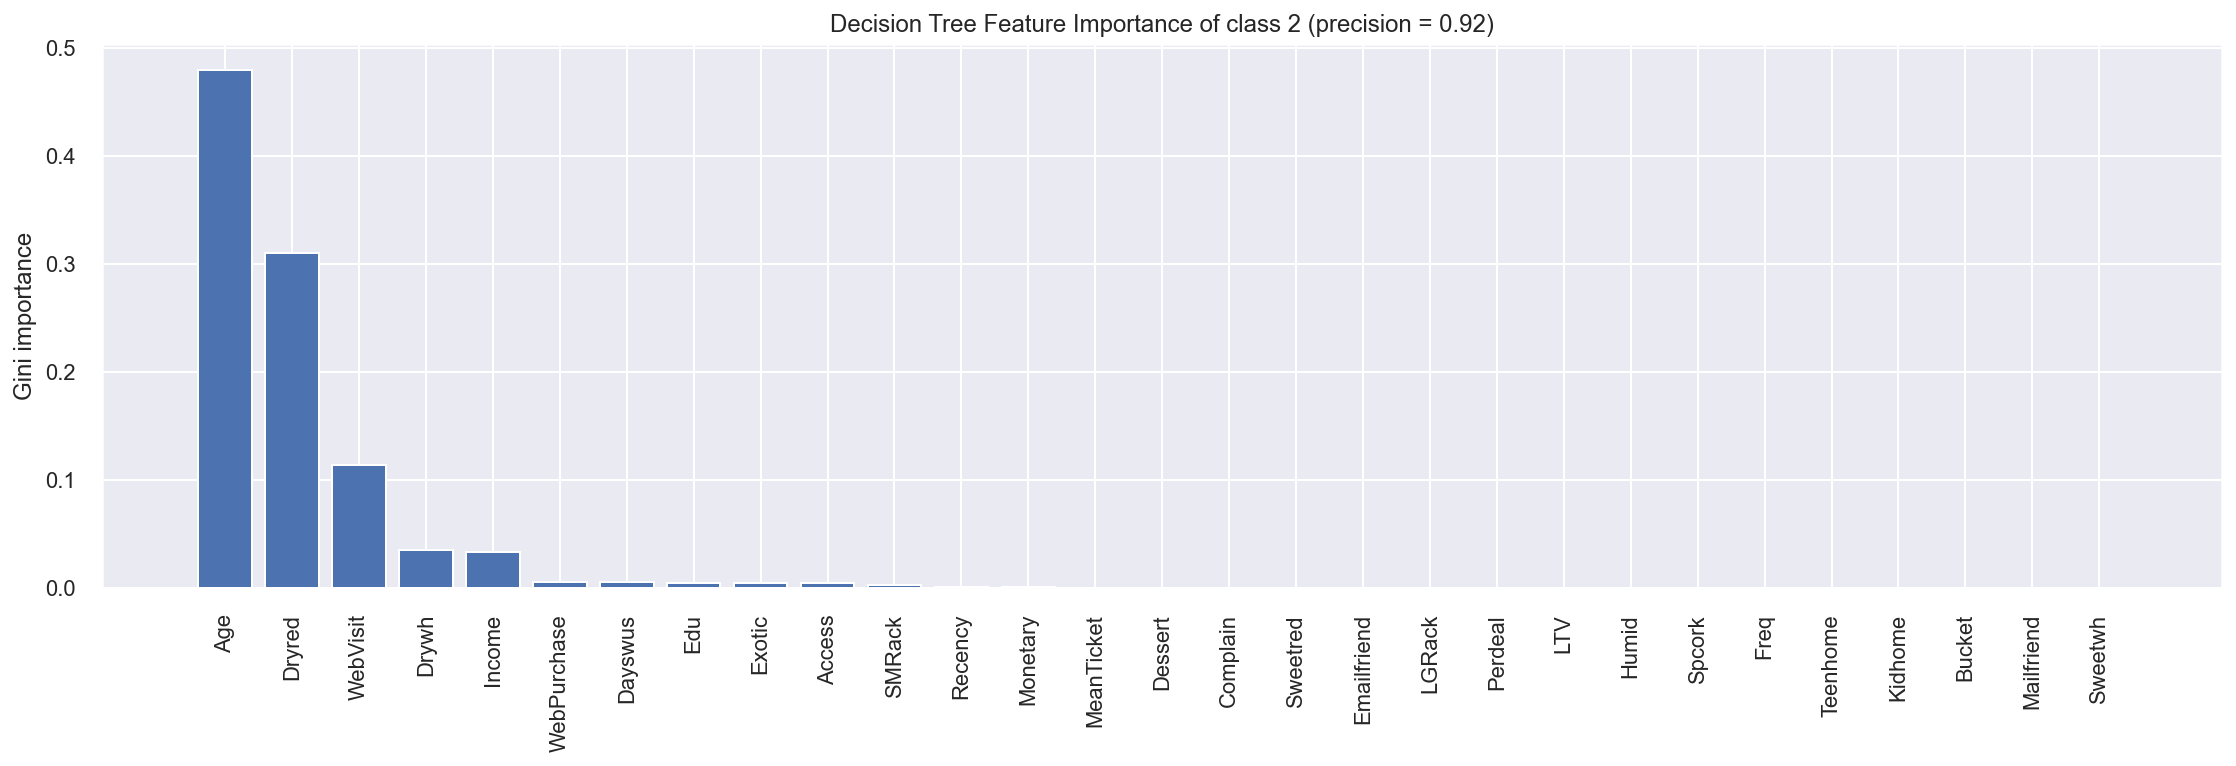

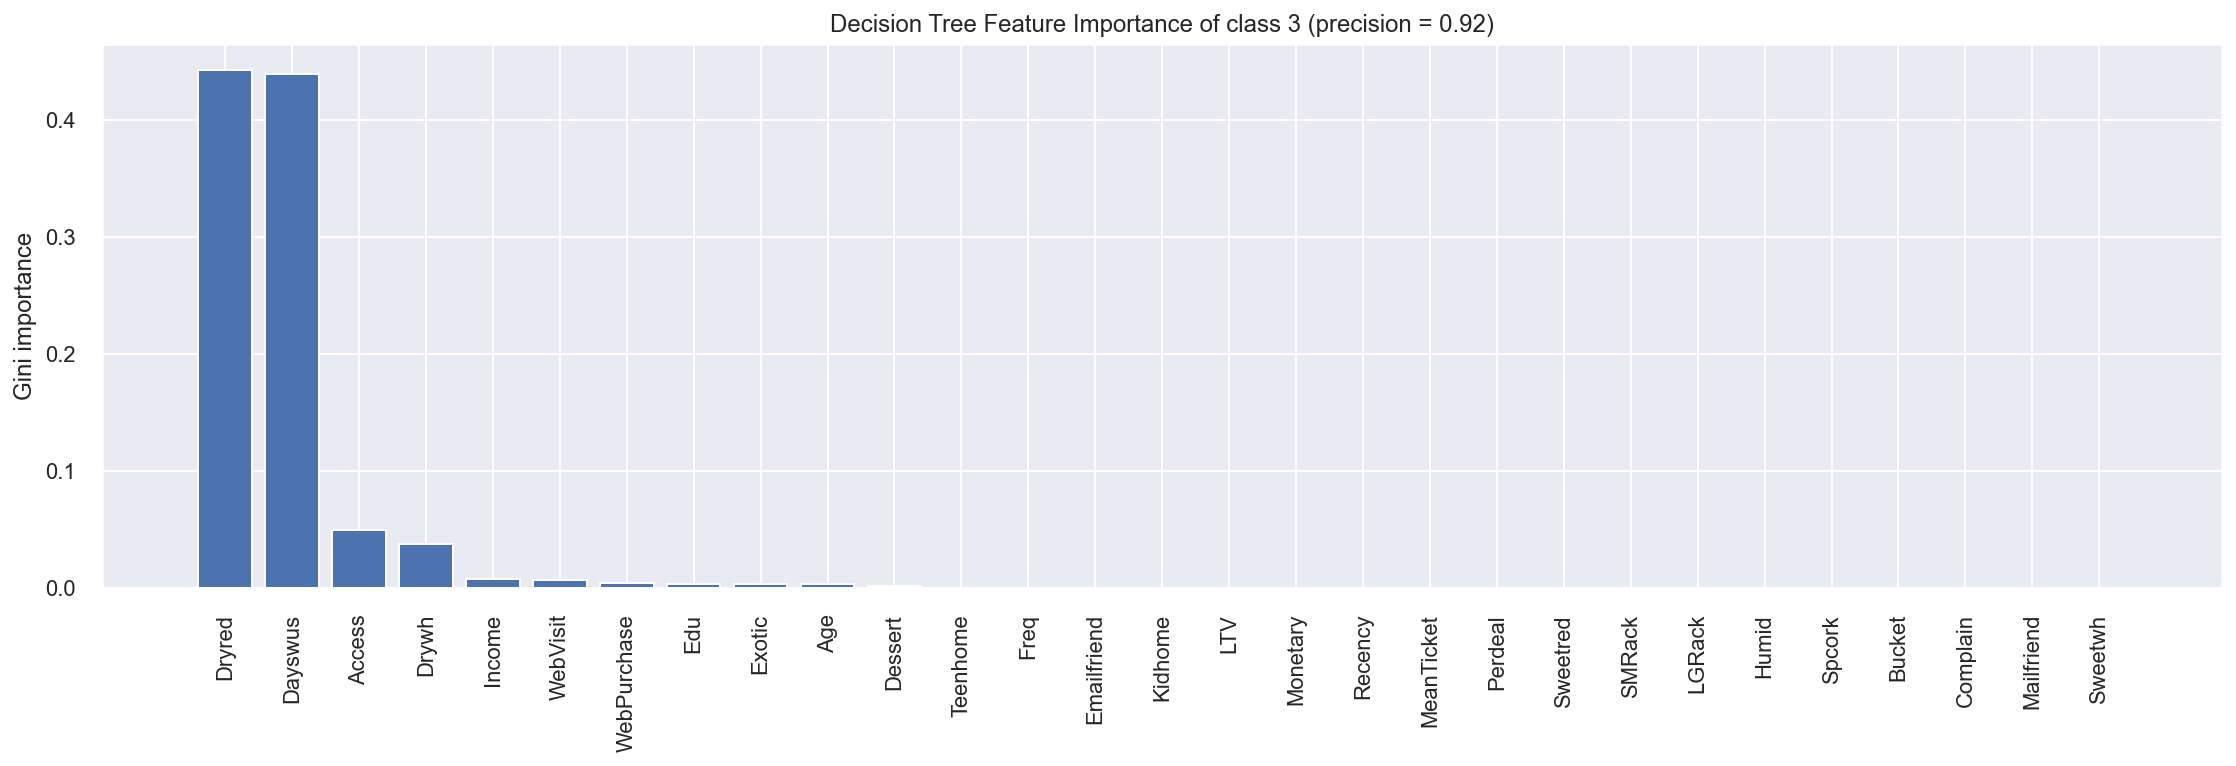

In [89]:
# Decision Tree Feature Importance plot
sns.set()
# data
feature_names = data_no_norm.drop(columns=['Cluster_RFM', 'merged_labels', 'Recency_score','Monetary_score', 'Freq_score']).columns
for i in range(n_classes):
    feature_importances = pd.Series(classifier.estimators_[i].feature_importances_, index=feature_names).\
        sort_values(ascending=False)
    # figure
    fig = plt.figure(figsize=(19,5))
    # axis
    plt.bar(x=feature_importances.index, height=feature_importances.values)
    # properties
    plt.ylabel("Gini importance")  # The importance of a feature is computed as the (normalized) total reduction of the 
                               # criterion brought by that feature. It is also known as the Gini importance.
    plt.xticks(rotation=90)
    plt.title('Decision Tree Feature Importance of class {0} (precision = {1:0.2f})'
             ''.format(i, precision[i][1]))#"Decision Tree Feature Importance {0}", fontsize=18)
    plt.show()